In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Optional, Union
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from plots import ForexPlotter

from data_handle import (
    ForexDataClean,
    ForexDataLoad,
    ForexPctChange,
    ForexQuickLook,
)

from features import (
    ForexTSFeatures,
    ForexCustomFeatures,
    ForexMomentumIndicators,
    ForexTrendIndicators,
    ForexVolatilityIndicators,
    ForexVolumeIndicators,
    ForexMASignals,
    ForexMACDSignals,
    ForexADXSignals,
    ForexParabolicSARSiganls,
    ForexRSISignals
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = ForexDataLoad(file_path = '../data/xauaud.csv').data
df_without_atr_vol_returns = ForexDataLoad(file_path = '../data/xauaud.csv').data

cleaner = ForexDataClean(data = data, fast_clean = True)
data = cleaner.data

add_volatility = ForexVolatilityIndicators(data = data)
data = add_volatility.get_all_volatility_indicators()

add_trend = ForexTrendIndicators(data = data)
data = add_trend.get_all_trend_indicators()

add_momentum = ForexMomentumIndicators(data = data)
data = add_momentum.get_all_momentum_indicators()

add_volume = ForexVolumeIndicators(data = data)
data = add_volume.get_all_volume_indicators()

customs = ForexCustomFeatures(data =data)
data = customs.get_all_custom_features()

cleaner = ForexDataClean(data = data)
data = cleaner.handle_missing_values(method = 'zero')

data = data[data.index >= '2020'].copy()
data.tail(10)

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers
Keep = first and subset = None
Removed 0 duplicate entries
Found 1 missing values
 dropped: 1 missing values .
OUTLIER DETECTION AND HANDLING
Method: quantile, Strategy: cap, Threshold: 3.0
Remove outliers: False
--------------------------------------------------
open: Found 766 outliers (383 low, 383 high)
Bounds: [1817.81300 - 5218.90300]
Original range: [1674.10000 - 5476.98000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

high: Found 764 outliers (381 low, 383 high)
Bounds: [1819.15000 - 5224.87300]
Original range: [1676.91000 - 5483.78000]
Method: Quantile 

open     high      low    close  volume  vol_atr_14  \
datetime                                                                      
2025-09-05 11:00:00  5421.73  5425.39  5415.28  5417.88       0   14.148133   
2025-09-05 12:00:00  5417.88  5429.94  5417.73  5427.42       0   14.009695   
2025-09-05 13:00:00  5427.42  5428.38  5421.64  5427.78       0   13.490431   
2025-09-05 14:00:00  5427.78  5431.89  5422.54  5431.70       0   13.194686   
2025-09-05 15:00:00  5431.90  5467.02  5422.86  5447.40       0   15.406494   
2025-09-05 16:00:00  5447.51  5456.26  5433.22  5455.01       0   15.951745   
2025-09-05 17:00:00  5454.84  5474.80  5451.73  5474.64       0   16.460192   
2025-09-05 18:00:00  5474.54  5477.82  5459.37  5468.49       0   16.602321   
2025-09-05 19:00:00  5468.33  5483.78  5466.57  5476.84       0   16.645726   
2025-09-05 20:00:00  5476.98  5479.45  5474.51  5477.23       0   15.809603   

                     vol_atr_21  vol_atr_28  vol_bb_upper_20  \
datetime                                                       
2025-09-05 11:00:00   14.579162   14.738345      5459.811894   
2025-09-05 12:00:00   14.466345   14.648047      5460.071856   
2025-09-05 13:00:00   14.098424   14.365617      5460.351910   
2025-09-05 14:00:00   13.872309   14.186488      5459.494274   
2025-09-05 15:00:00   15.314580   15.256971      5458.044297   
2025-09-05 16:00:00   15.682457   15.534936      5457.782513   
2025-09-05 17:00:00   16.034244   15.804045      5465.025034   
2025-09-05 18:00:00   16.149280   15.898544      5469.104926   
2025-09-05 19:00:00   16.199791   15.945381      5474.655038   
2025-09-05 20:00:00   15.663610   15.552332      5479.801052   

                     vol_bb_middle_20  ...  is_month_end  is_quarter_end  \
datetime                               ...                                 
2025-09-05 11:00:00         5441.1630  ...             0               0   
2025-09-05 12:00:00         5440.4835  ...             0               0   
2025-09-05 13:00:00         5440.0690  ...             0               0   
2025-09-05 14:00:00         5439.2495  ...             0               0   
2025-09-05 15:00:00         5438.8385  ...             0               0   
2025-09-05 16:00:00         5438.7805  ...             0               0   
2025-09-05 17:00:00         5440.4165  ...             0               0   
2025-09-05 18:00:00         5441.6360  ...             0               0   
2025-09-05 19:00:00         5443.1985  ...             0               0   
2025-09-05 20:00:00         5445.1355  ...             0               0   

                     is_year_end  season  minutes_since_monday_open  \
datetime                                                              
2025-09-05 11:00:00            0  summer                       6420   
2025-09-05 12:00:00            0  summer                       6480   
2025-09-05 13:00:00            0  summer                       6540   
2025-09-05 14:00:00            0  summer                       6600   
2025-09-05 15:00:00            0  summer                       6660   
2025-09-05 16:00:00            0  summer                       6720   
2025-09-05 17:00:00            0  summer                       6780   
2025-09-05 18:00:00            0  summer                       6840   
2025-09-05 19:00:00            0  summer                       6900   
2025-09-05 20:00:00            0  summer                       6960   

                     period_of_day  days_to_month_end  days_to_quarter_end  \
datetime                                                                     
2025-09-05 11:00:00        morning                 25                   25   
2025-09-05 12:00:00        morning                 25                   25   
2025-09-05 13:00:00      afternoon                 25                   25   
2025-09-05 14:00:00      afternoon                 25                   25   
2025-09-05 15:00:00      afternoon                 25                   

In [3]:
add_rsi_signals = ForexRSISignals(data = data)

RSI SIGNAL GENERATION
Available functions: 
1 rsi_overbought_oversold_signals 
2 rsi_centerline_signals 
3 rsi_divergence_signals 
4 rsi_momentum_signals 
5 rsi_failure_swing_signals 
6 rsi_trend_reversal_signals 
7 generate_all_rsi_signals


In [4]:
s_rsi_data = add_rsi_signals.rsi_overbought_oversold_signals()

In [5]:
s_rsi_data = add_rsi_signals.rsi_centerline_signals()

In [6]:
s_rsi_data = add_rsi_signals.rsi_divergence_signals()

In [7]:
s_rsi_data = add_rsi_signals.rsi_momentum_signals()

In [8]:
s_rsi_data = add_rsi_signals.rsi_failure_swing_signals()

In [9]:
s_rsi_data = add_rsi_signals.rsi_trend_reversal_signals()

In [10]:
s_rsi_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33547 entries, 2020-01-02 01:00:00 to 2025-09-05 20:00:00
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   close              33547 non-null  float64
 1   rsi_14_overbought  33547 non-null  int64  
 2   rsi_21_overbought  33547 non-null  int64  
 3   rsi_28_overbought  33547 non-null  int64  
 4   rsi_14_centerline  33547 non-null  int64  
 5   rsi_21_centerline  33547 non-null  int64  
 6   rsi_28_centerline  33547 non-null  int64  
 7   rsi_14_divergence  33547 non-null  int64  
 8   rsi_21_divergence  33547 non-null  int64  
 9   rsi_28_divergence  33547 non-null  int64  
 10  rsi_14_momentum    33547 non-null  int64  
 11  rsi_21_momentum    33547 non-null  int64  
 12  rsi_28_momentum    33547 non-null  int64  
 13  rsi_14_swing_fail  33547 non-null  int64  
 14  rsi_21_swing_fail  33547 non-null  int64  
 15  rsi_28_swing_fail  33547 non-null  

In [11]:
#need to fix momentum_rsi_14_slope

In [12]:
s_rsi_data = add_rsi_signals.generate_all_rsi_signals()

                       close  rsi_14_overbought  rsi_21_overbought  \
datetime                                                             
2025-09-05 11:00:00  5417.88                  0                  0   
2025-09-05 12:00:00  5427.42                  0                  0   
2025-09-05 13:00:00  5427.78                  0                  0   
2025-09-05 14:00:00  5431.70                  0                  0   
2025-09-05 15:00:00  5447.40                  0                  0   
2025-09-05 16:00:00  5455.01                  0                  0   
2025-09-05 17:00:00  5474.64                  0                  0   
2025-09-05 18:00:00  5468.49                  0                  0   
2025-09-05 19:00:00  5476.84                  0                  0   
2025-09-05 20:00:00  5477.23                  0                  0   

                     rsi_28_overbought  rsi_14_centerline  rsi_21_centerline  \
datetime                                                                       

In [13]:
plotter = ForexPlotter(data = s_rsi_data)

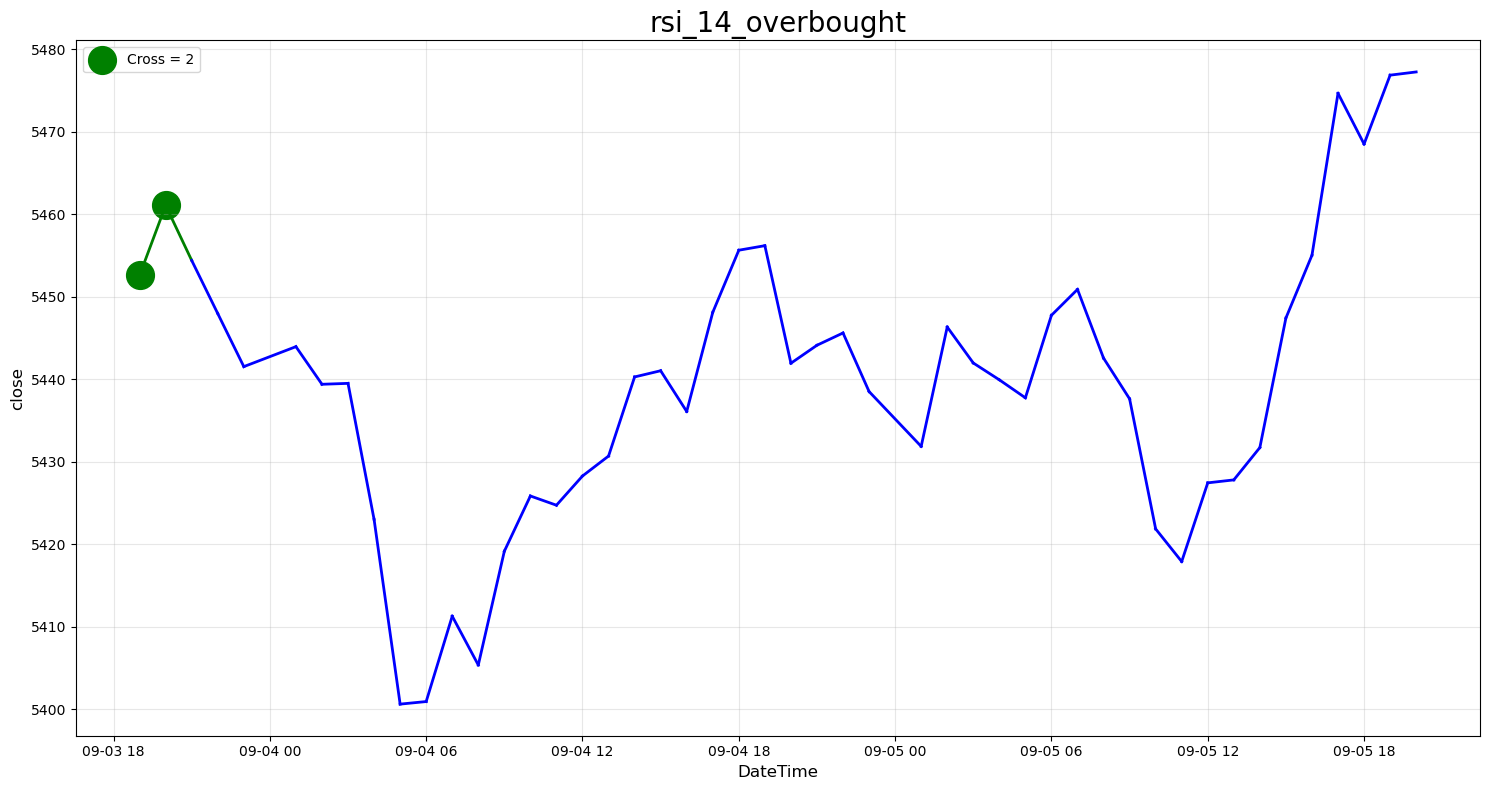

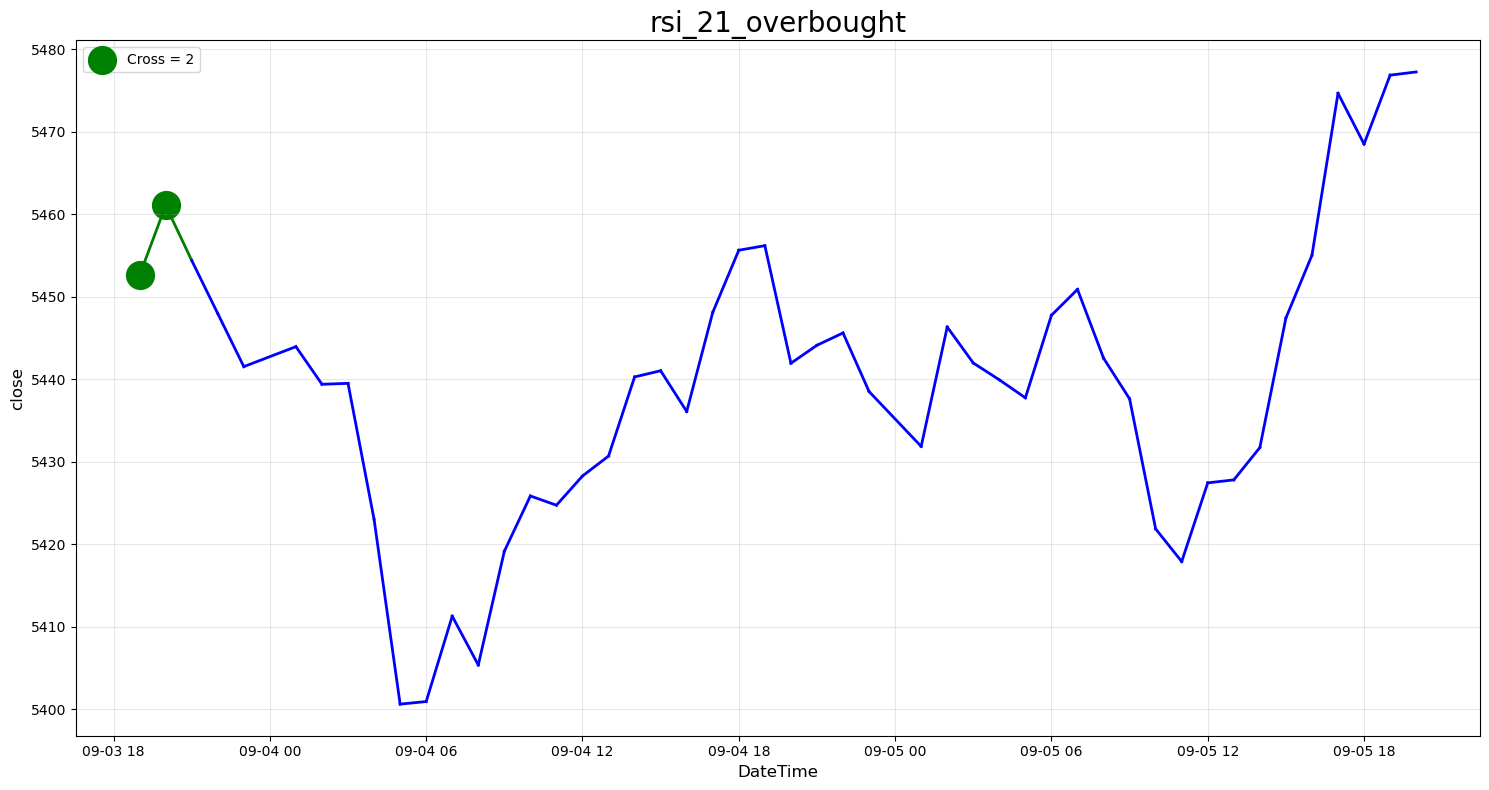

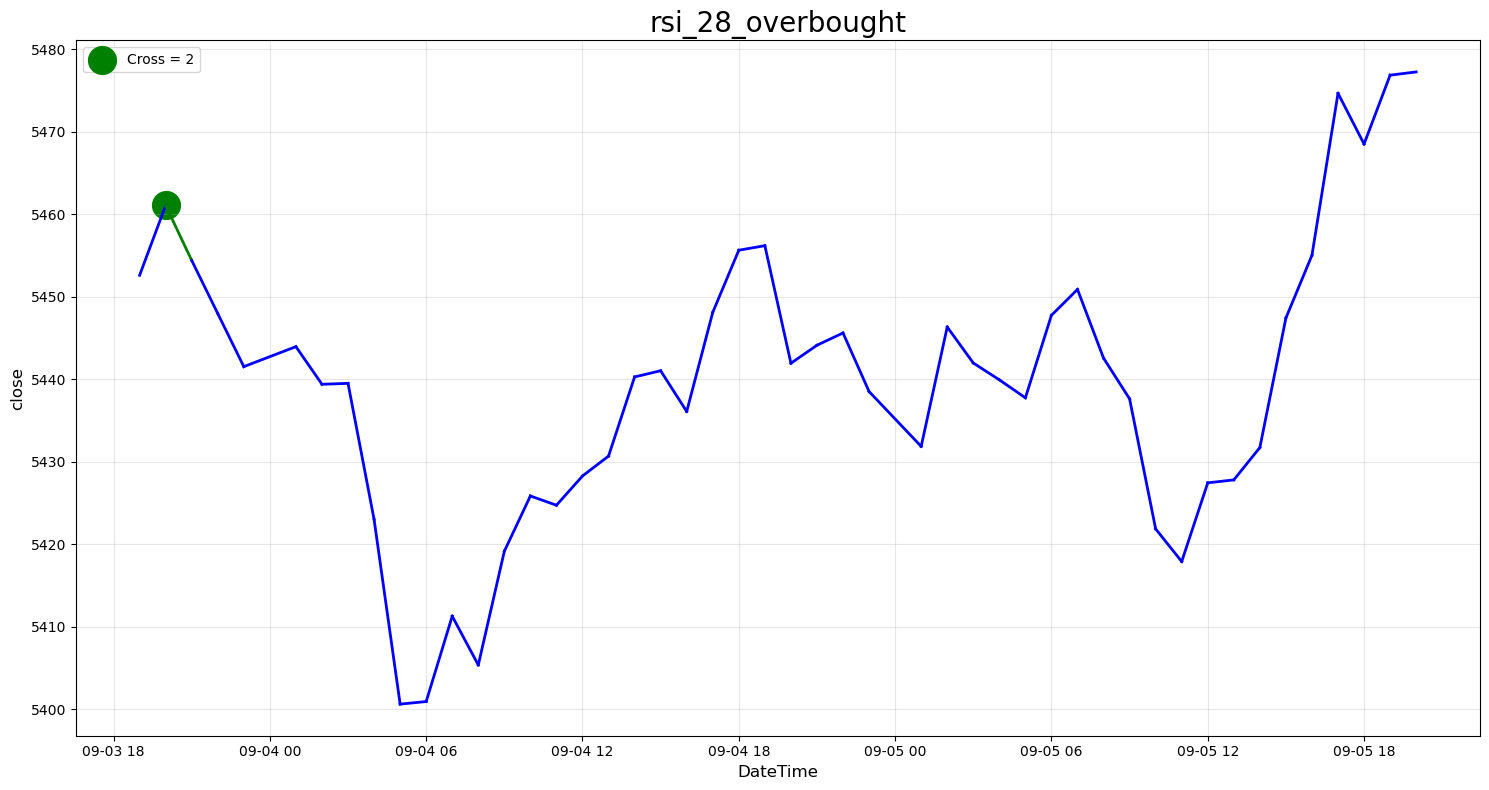

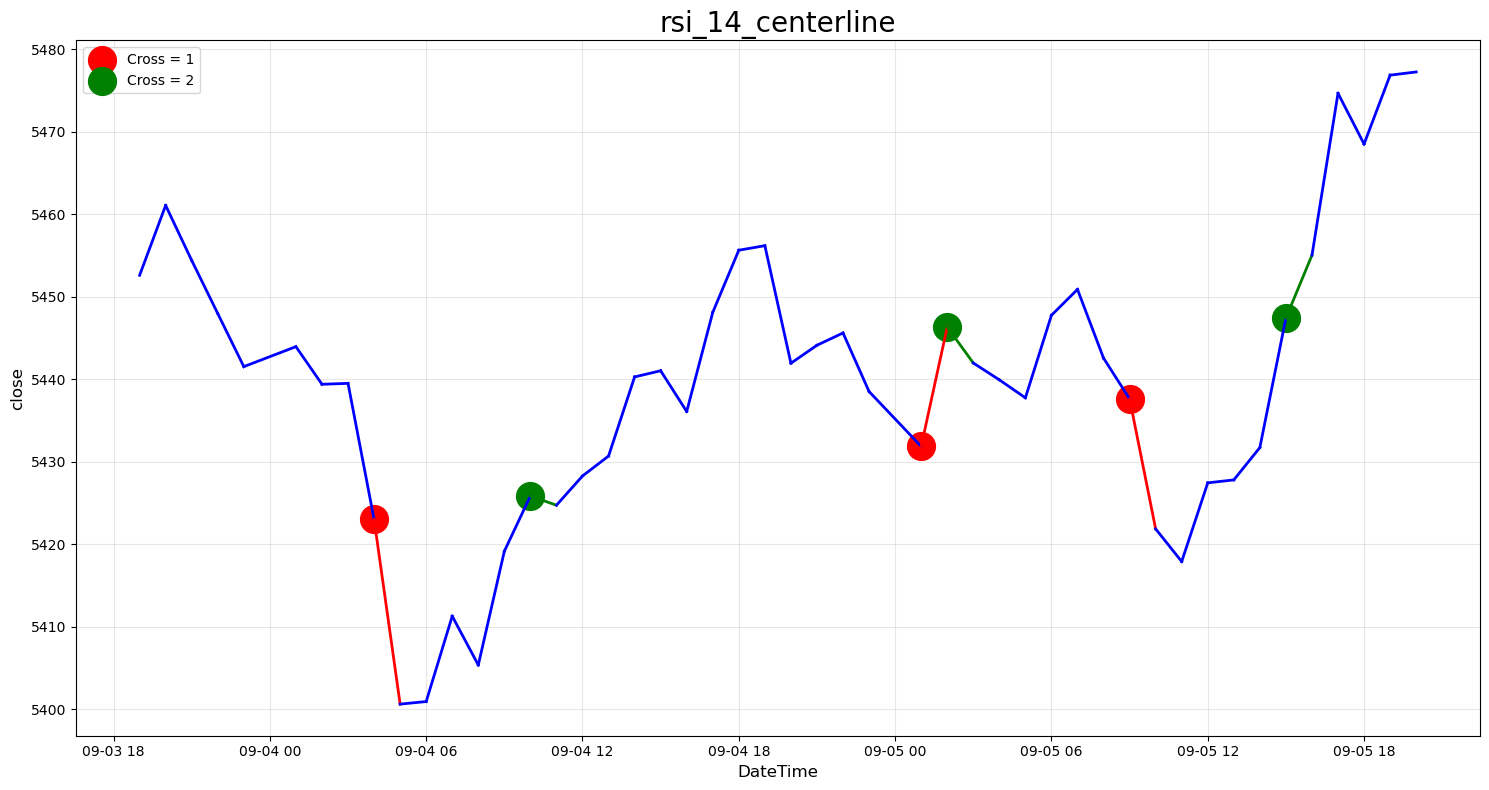

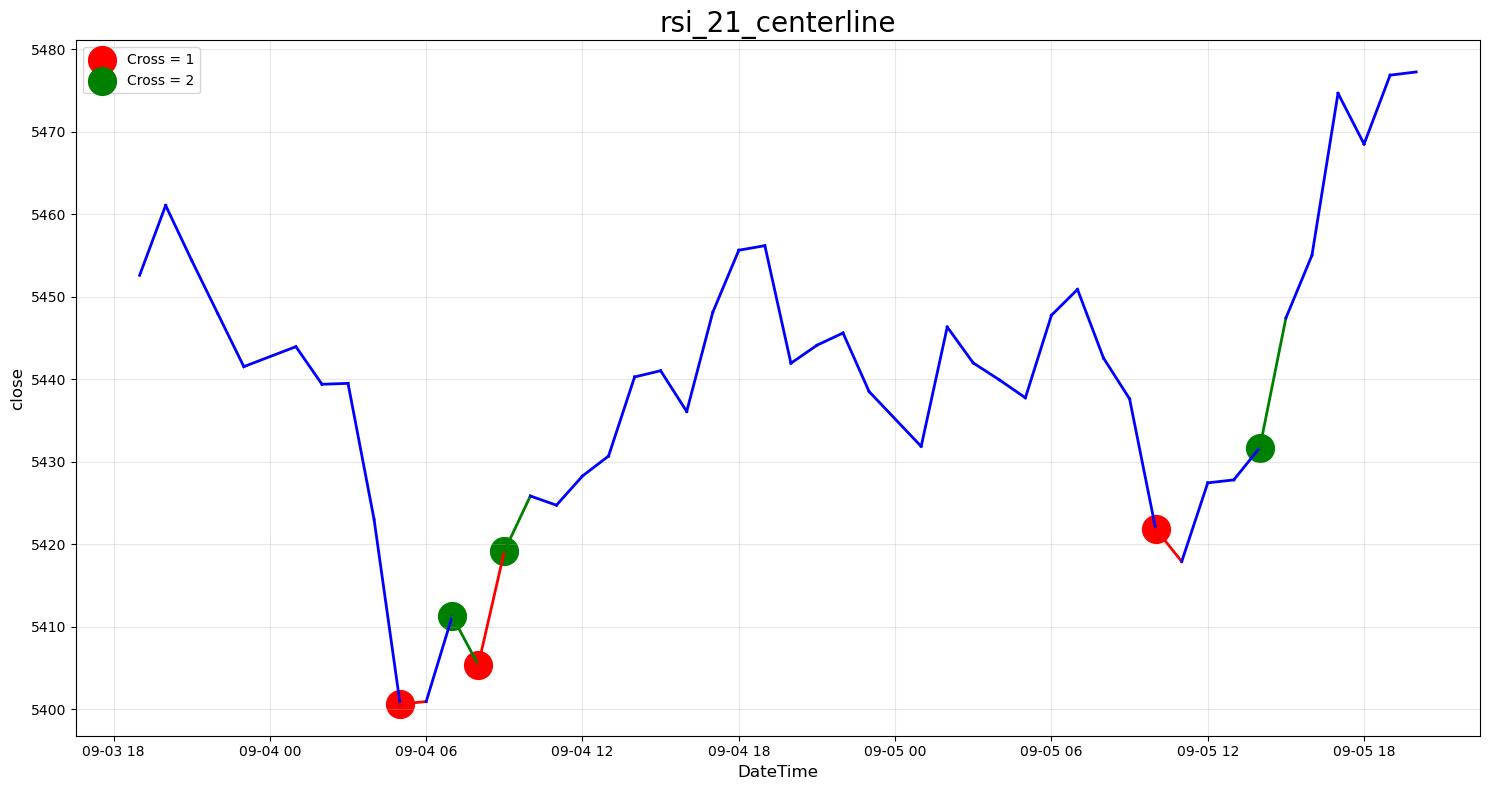

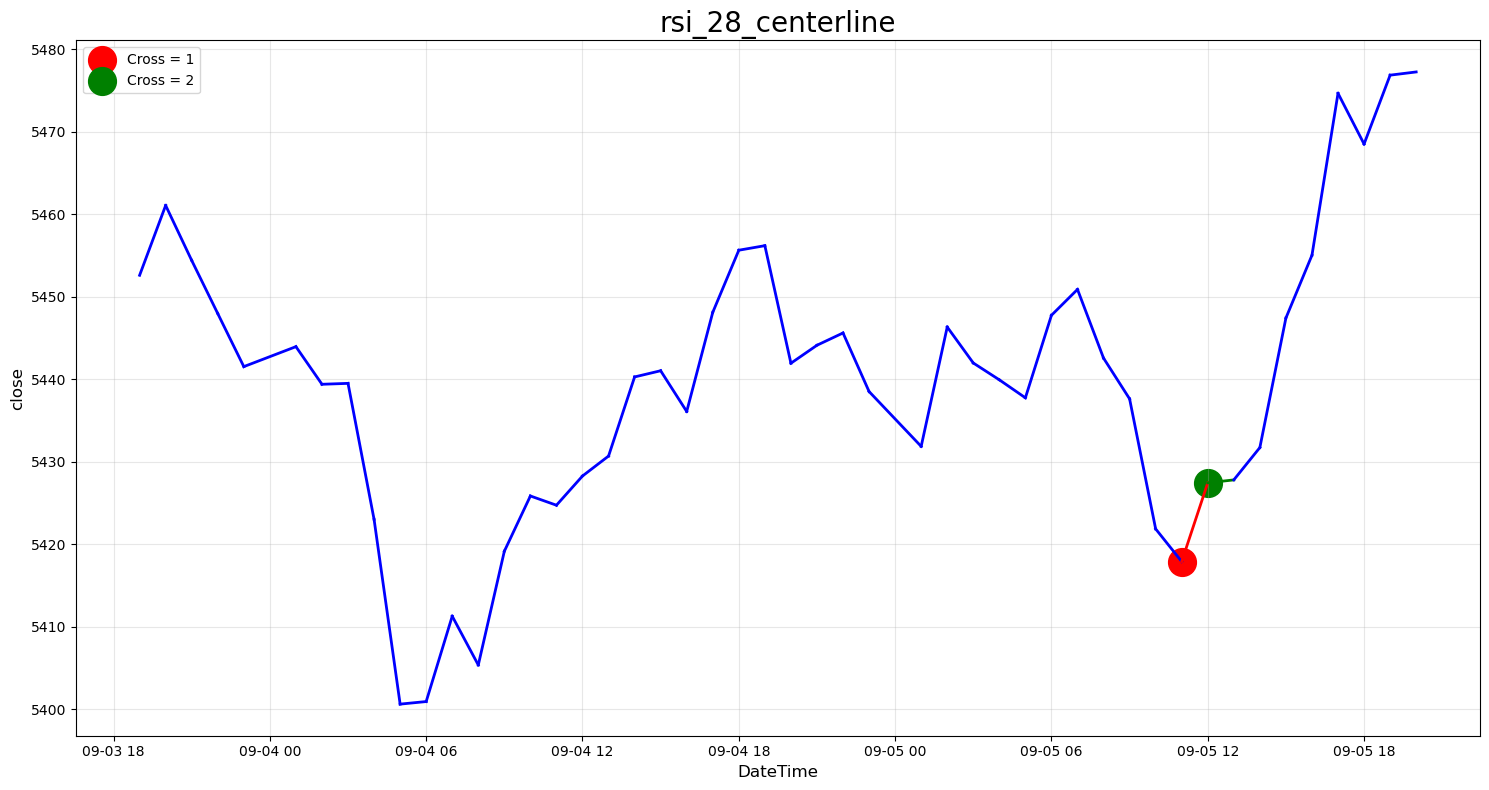

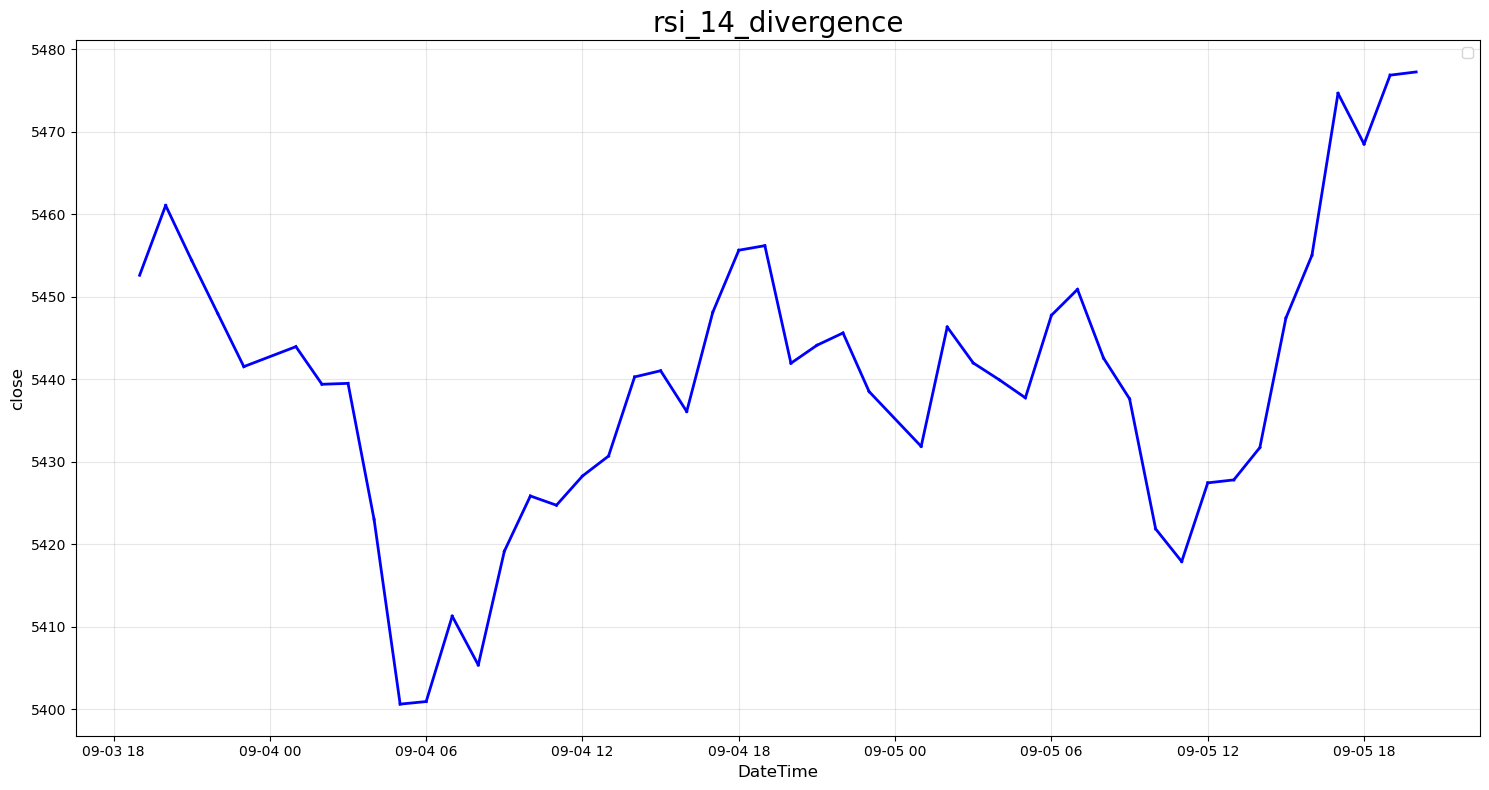

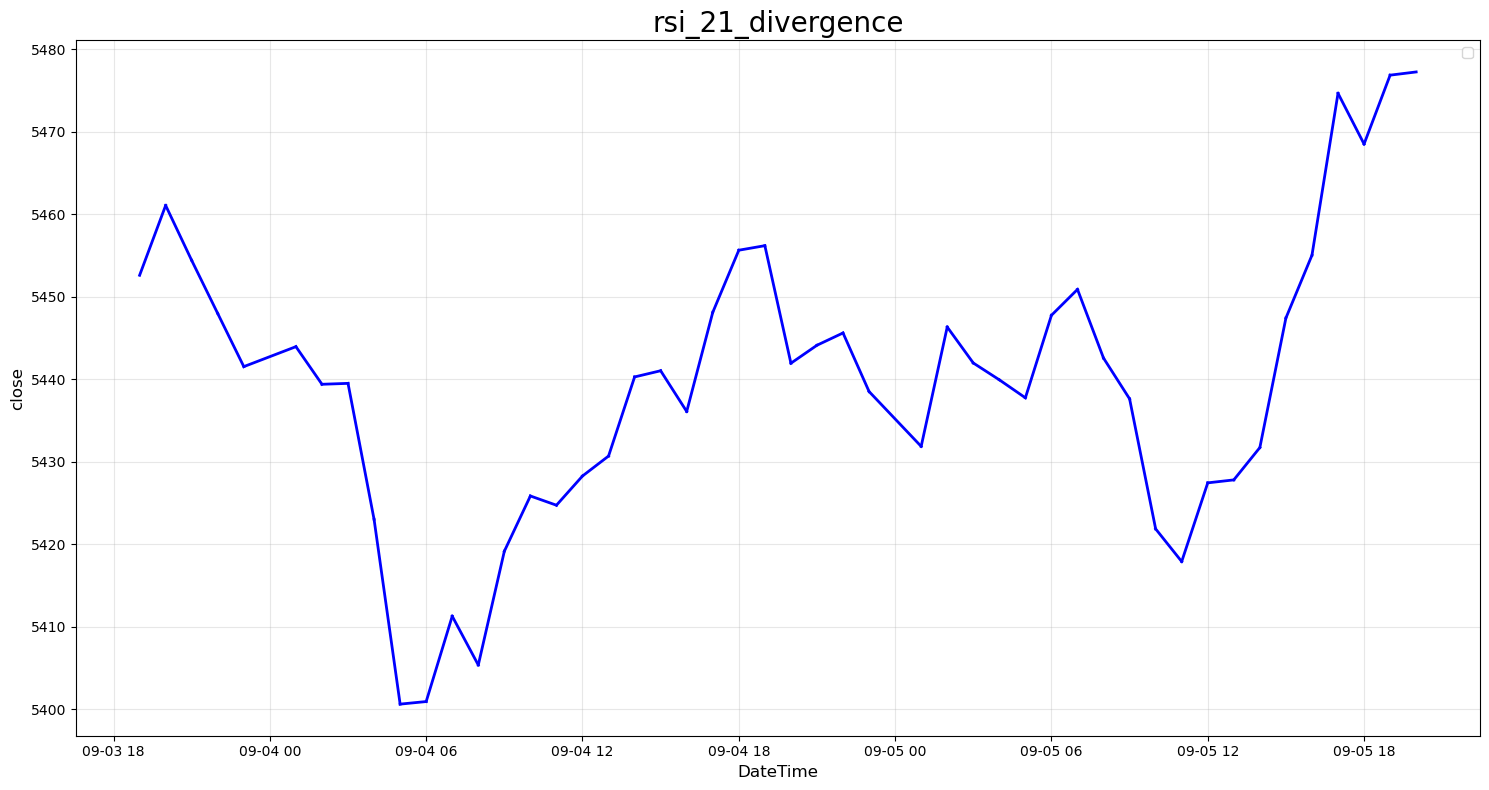

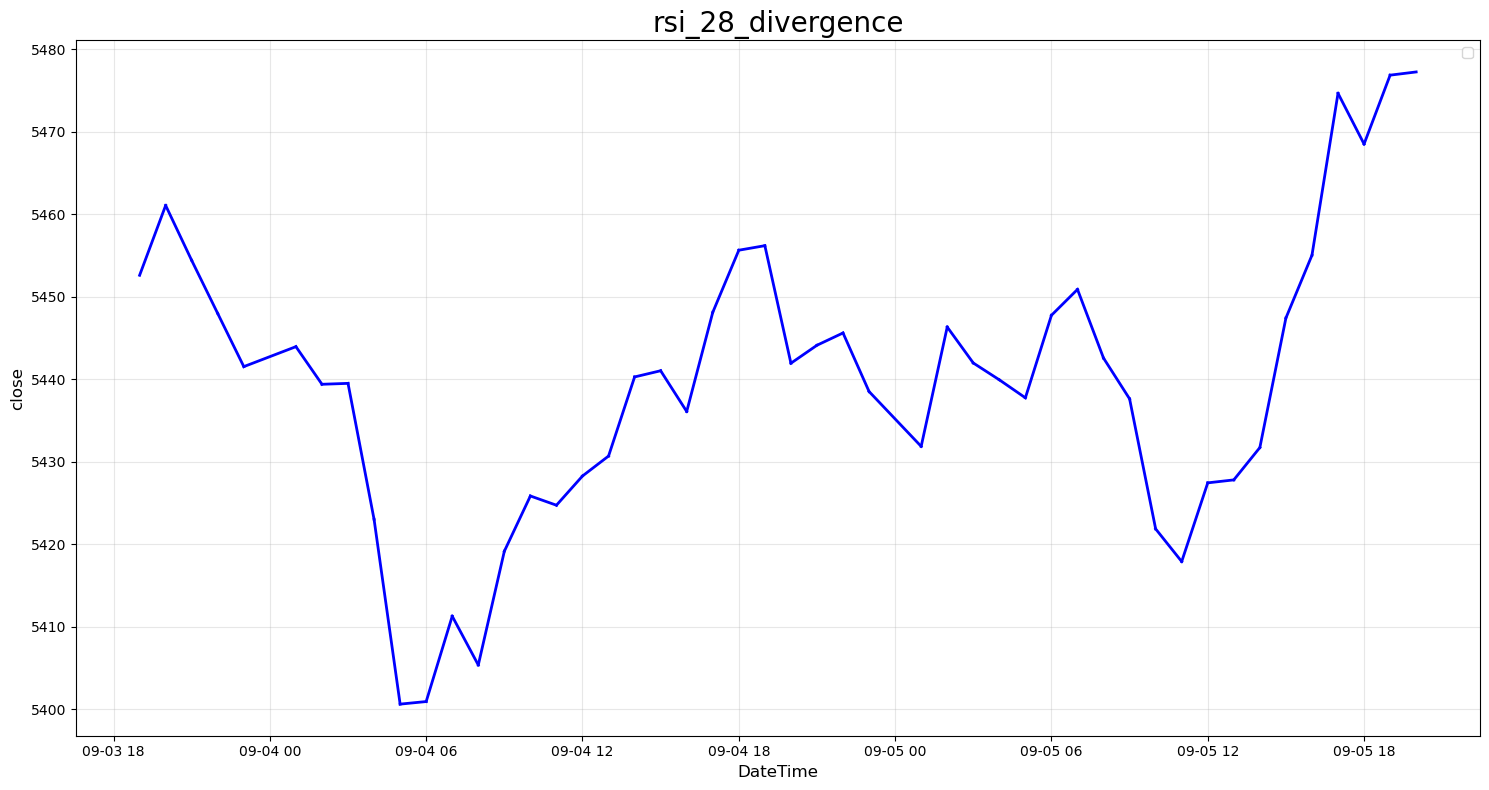

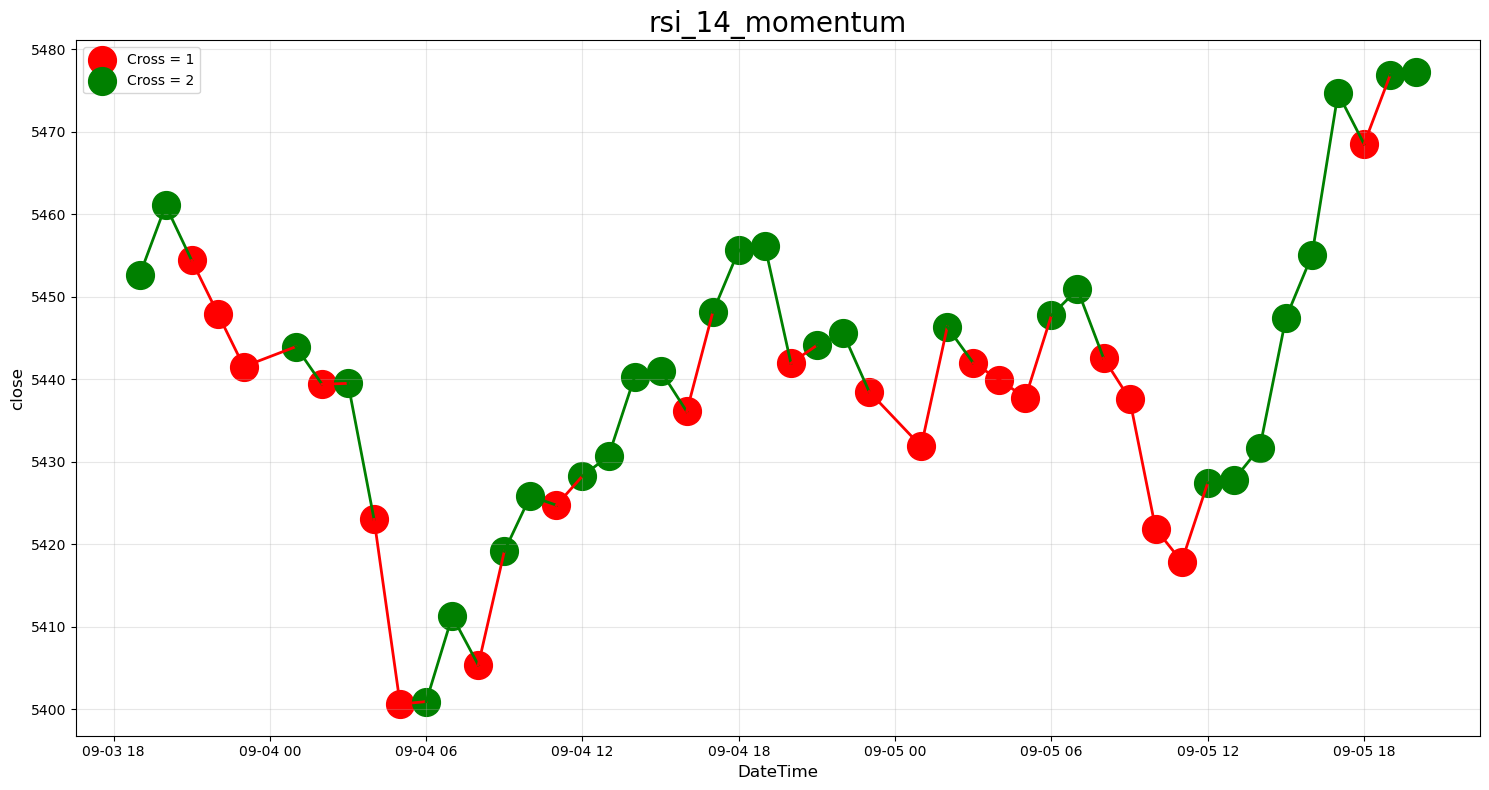

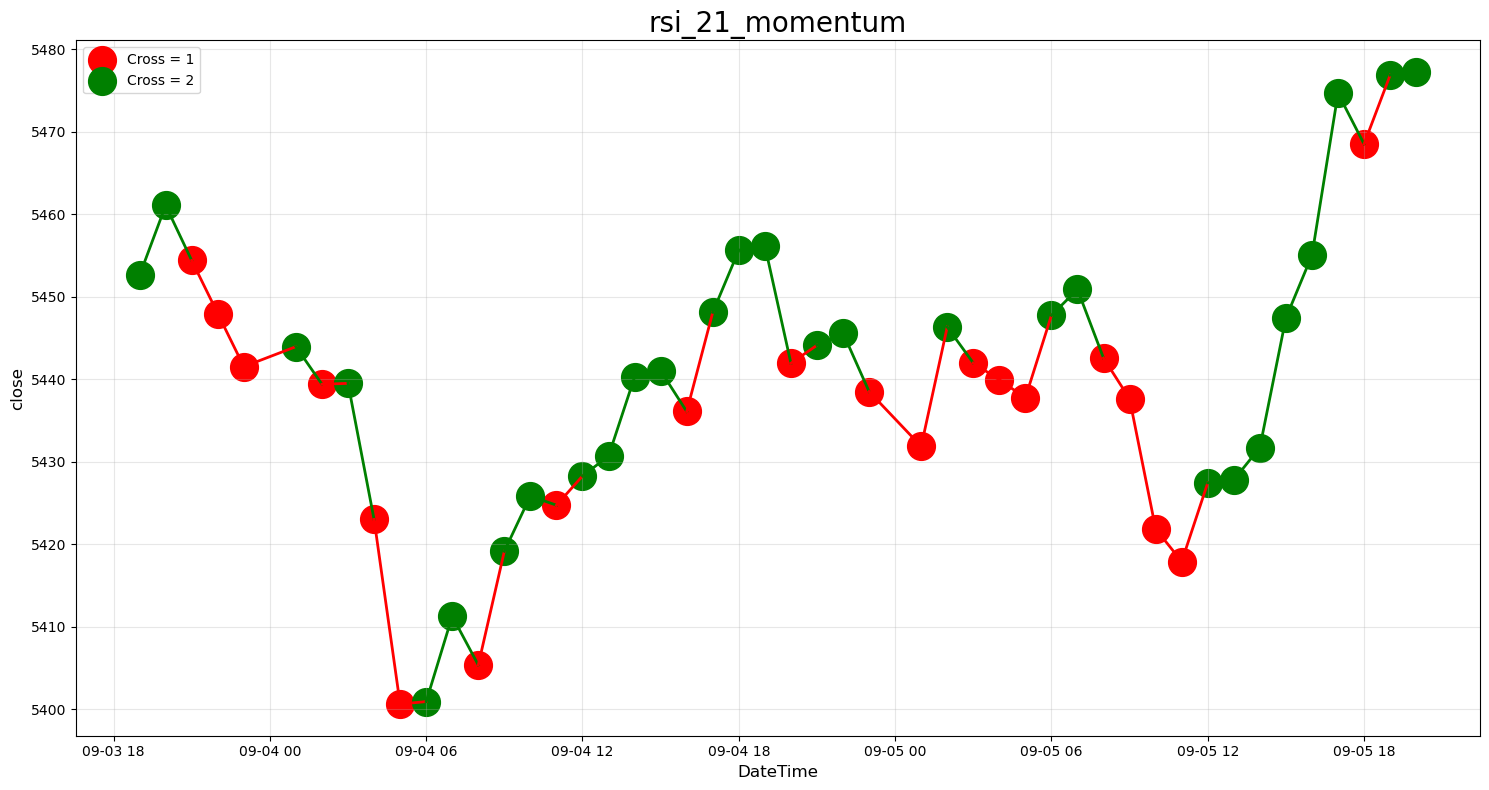

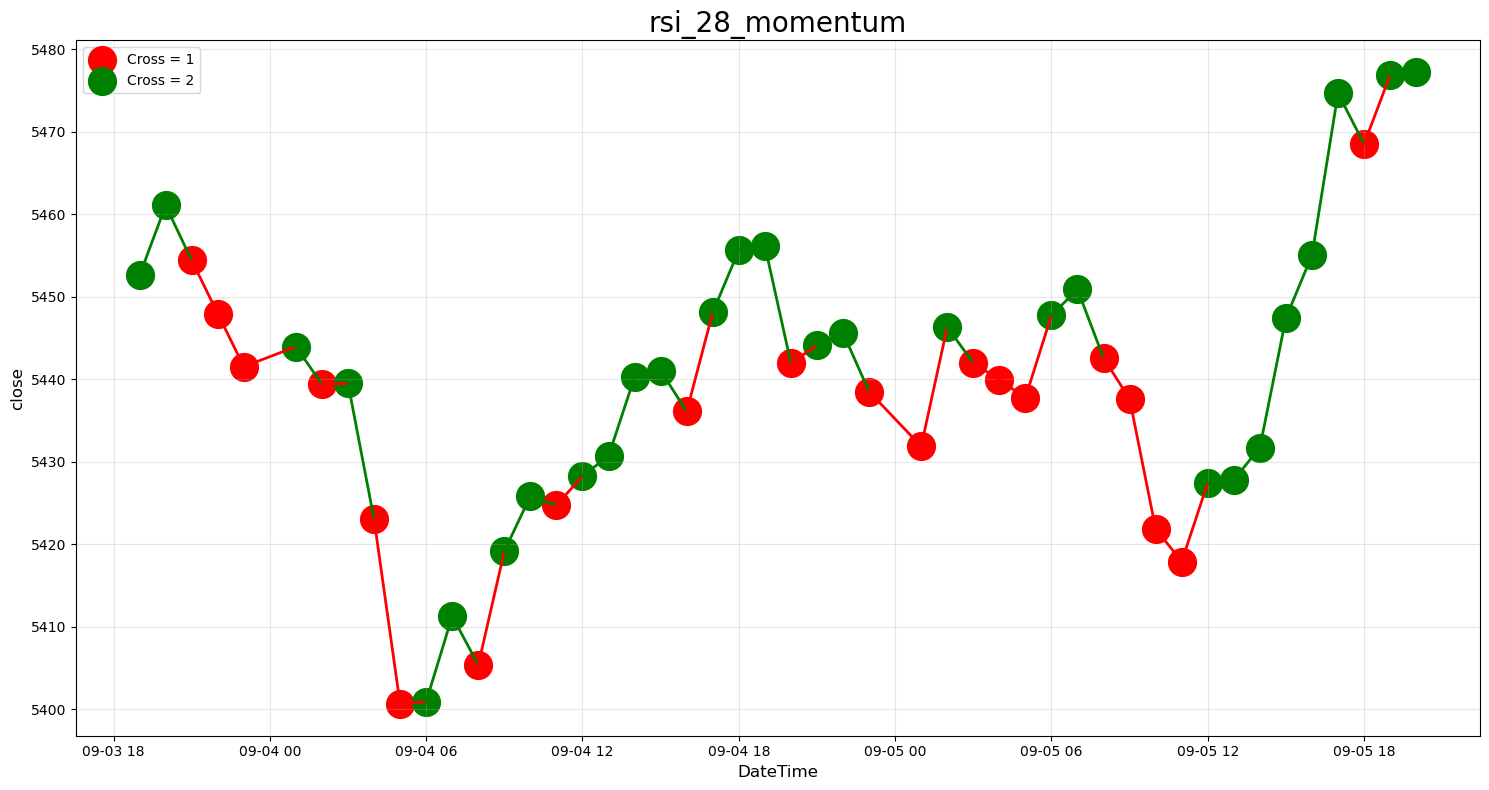

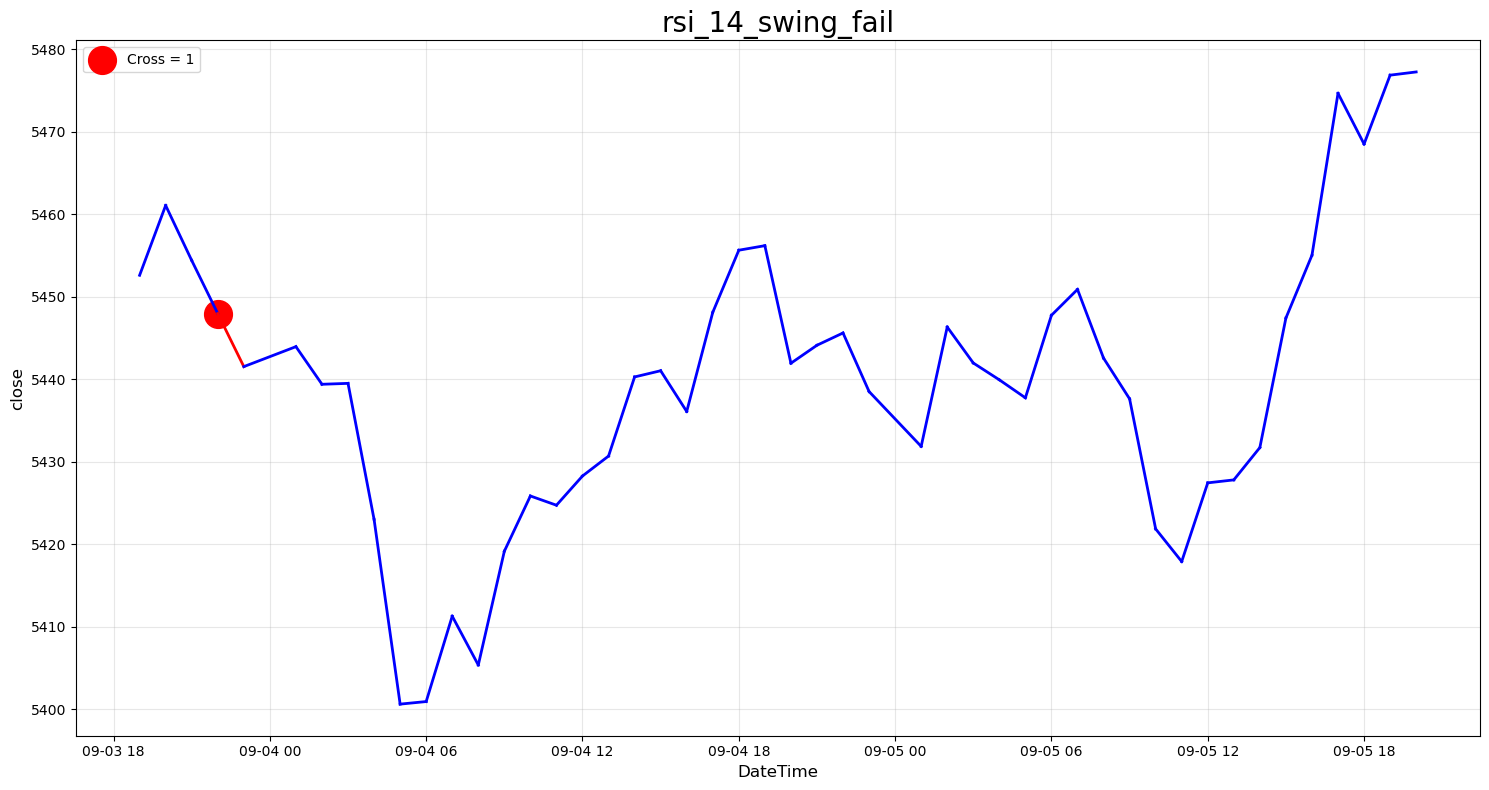

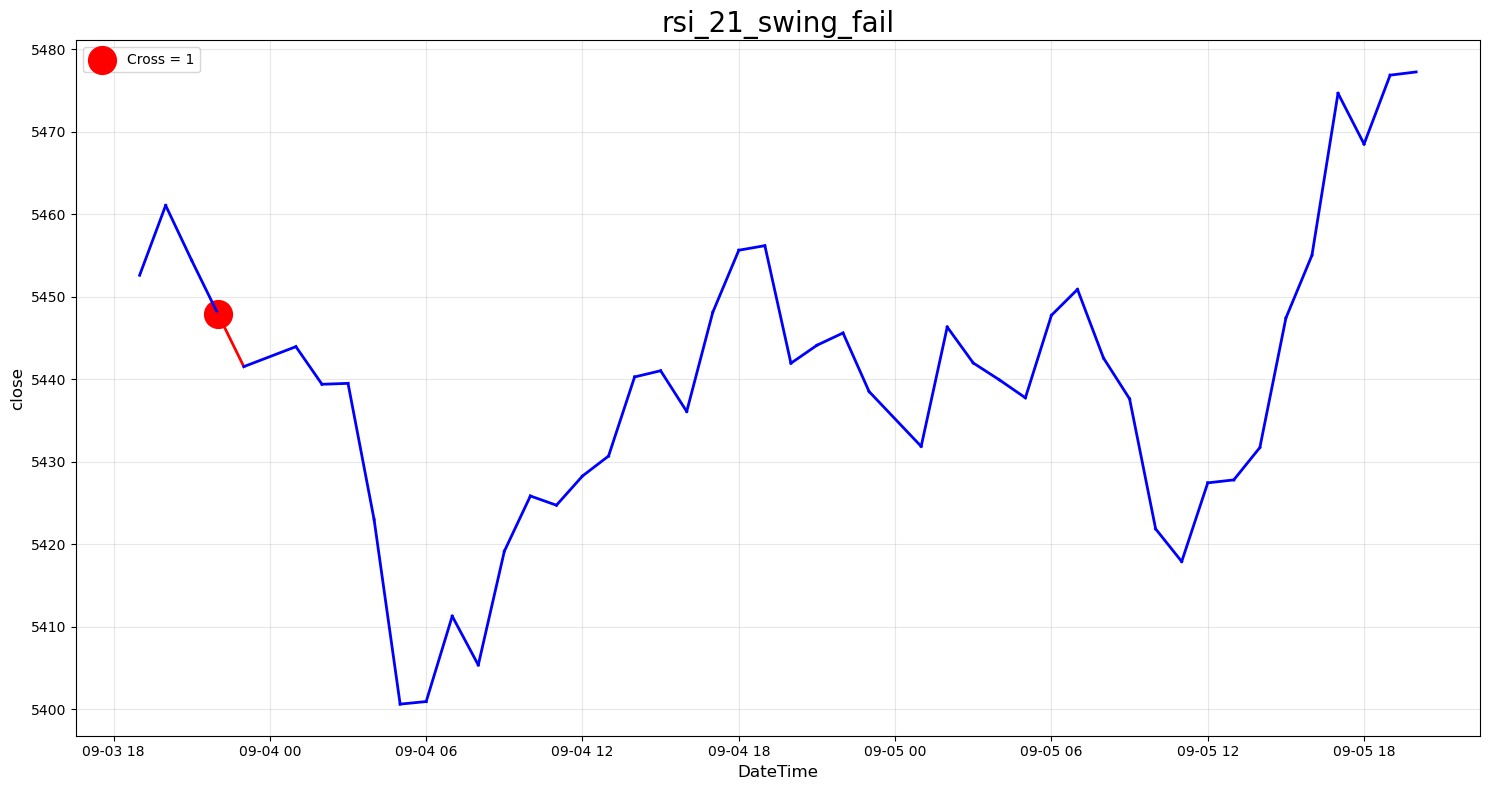

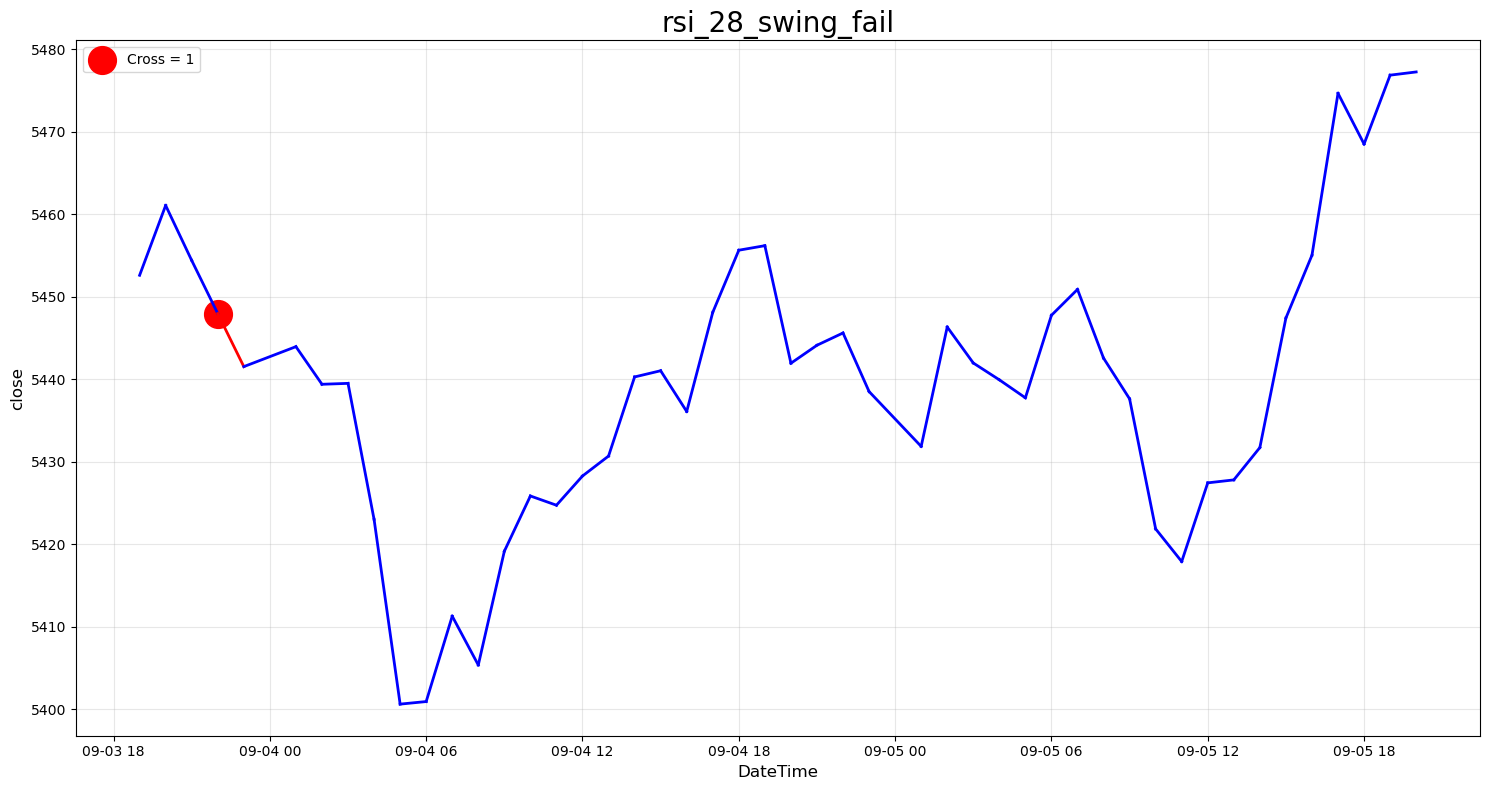

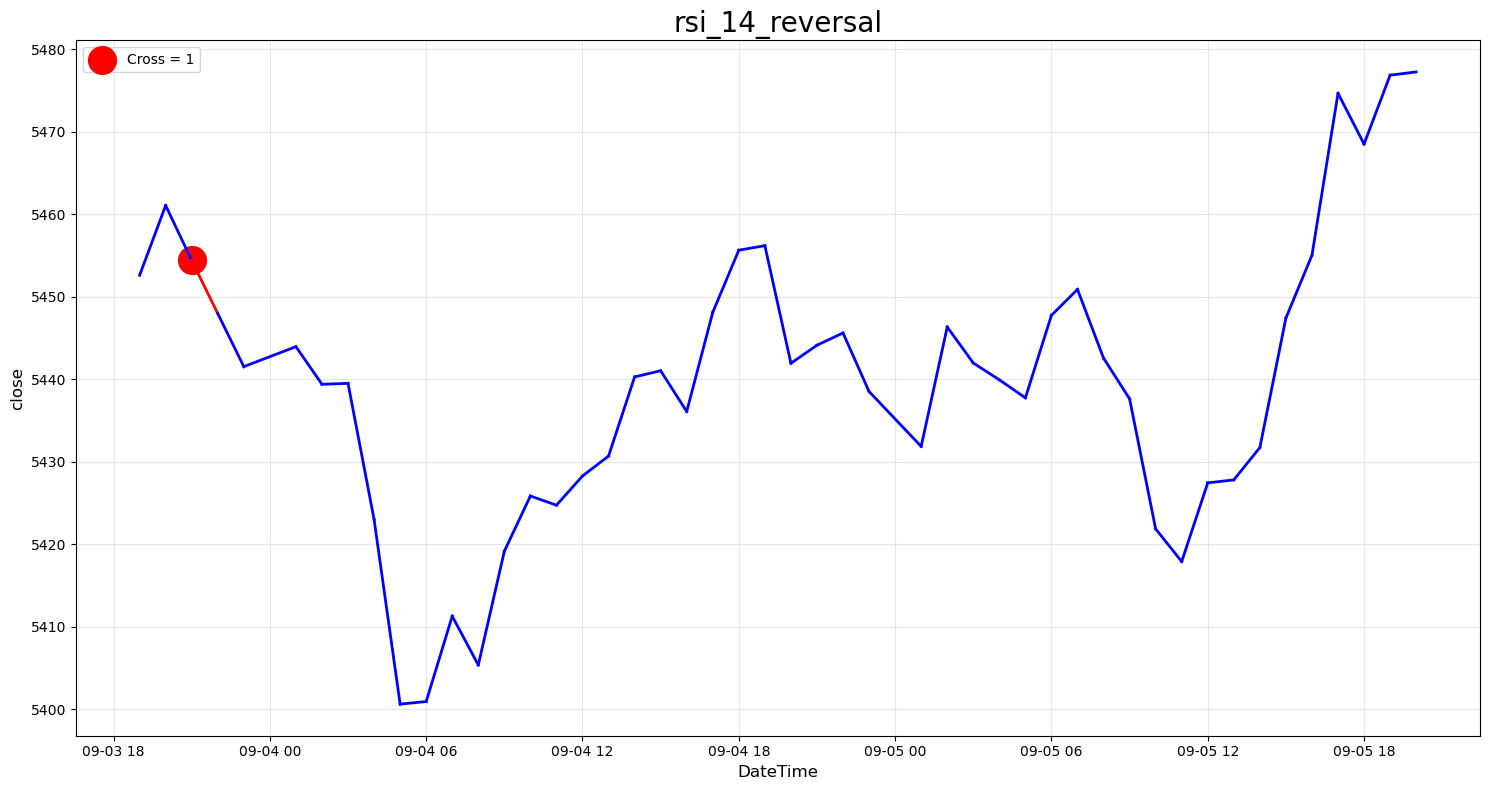

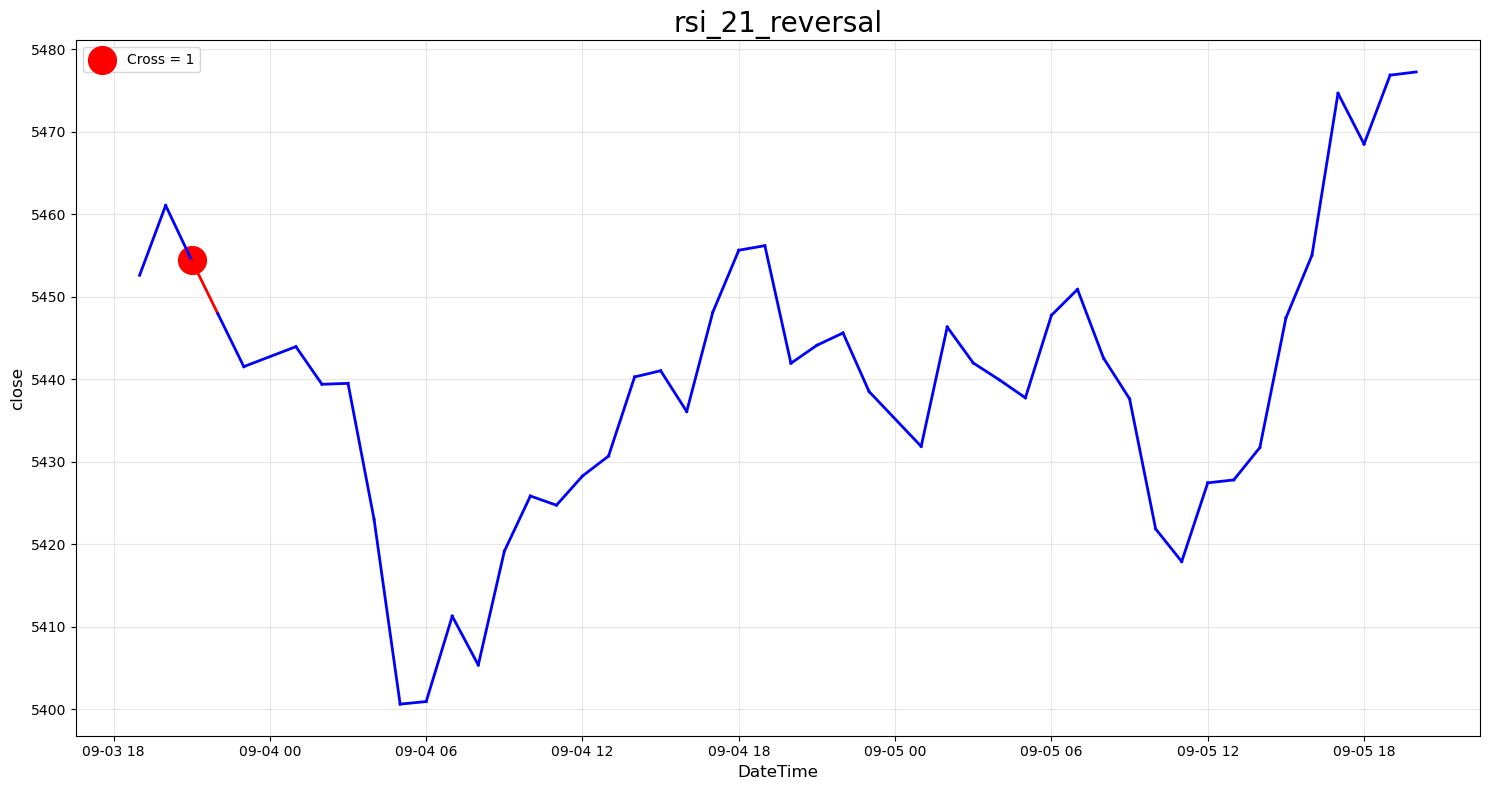

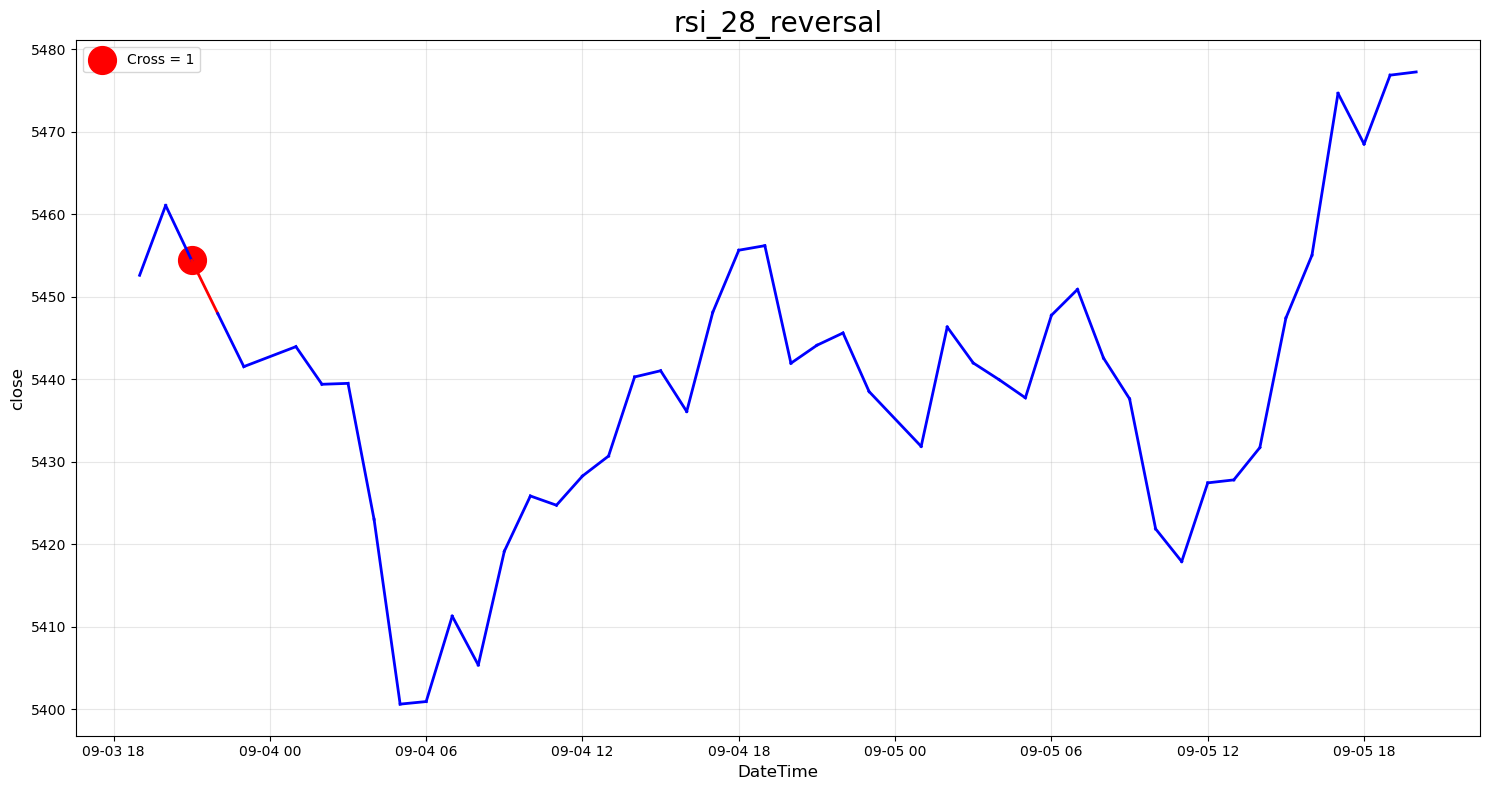

In [14]:
plotter.plot_signals(periods = 48)

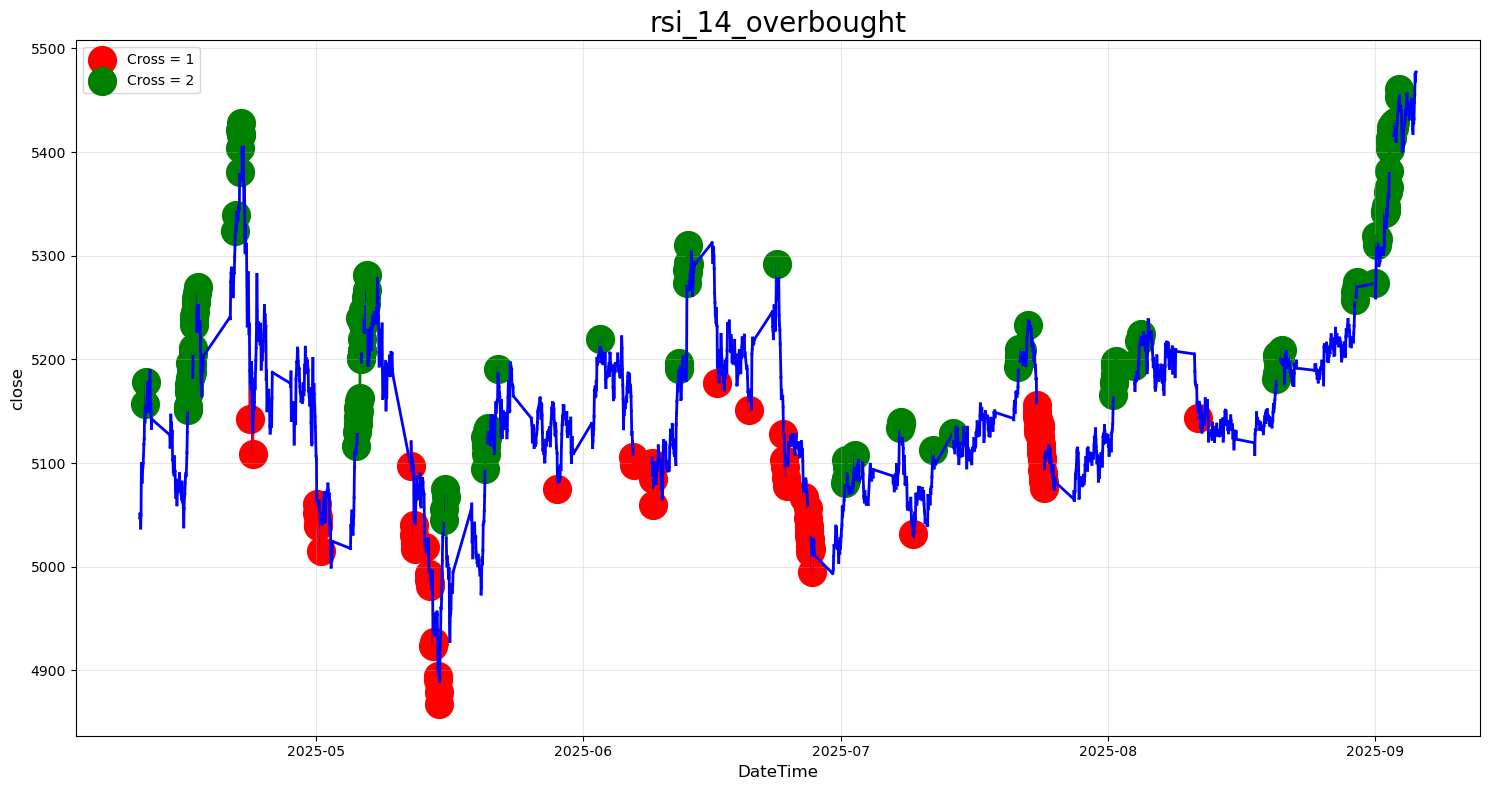

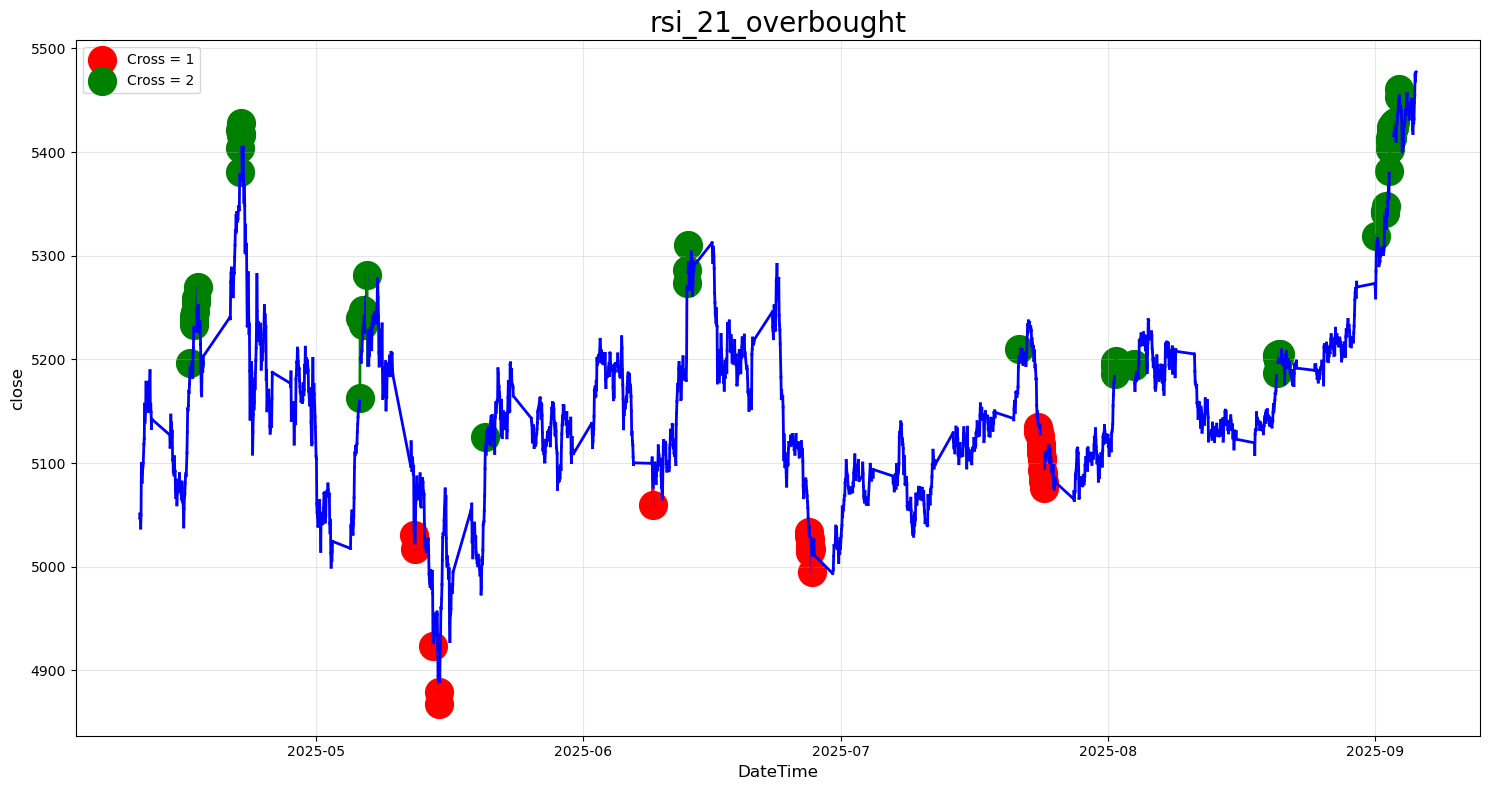

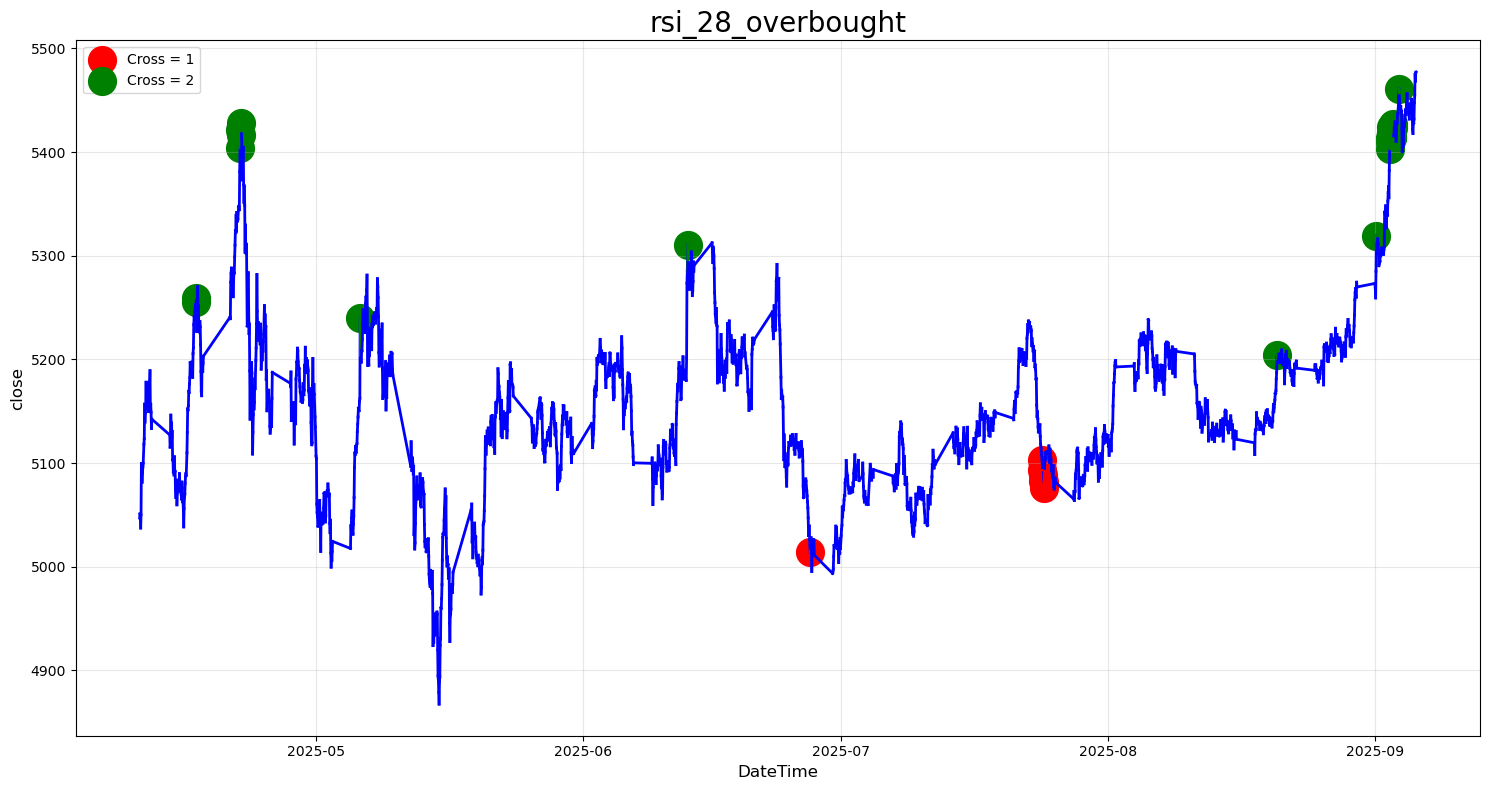

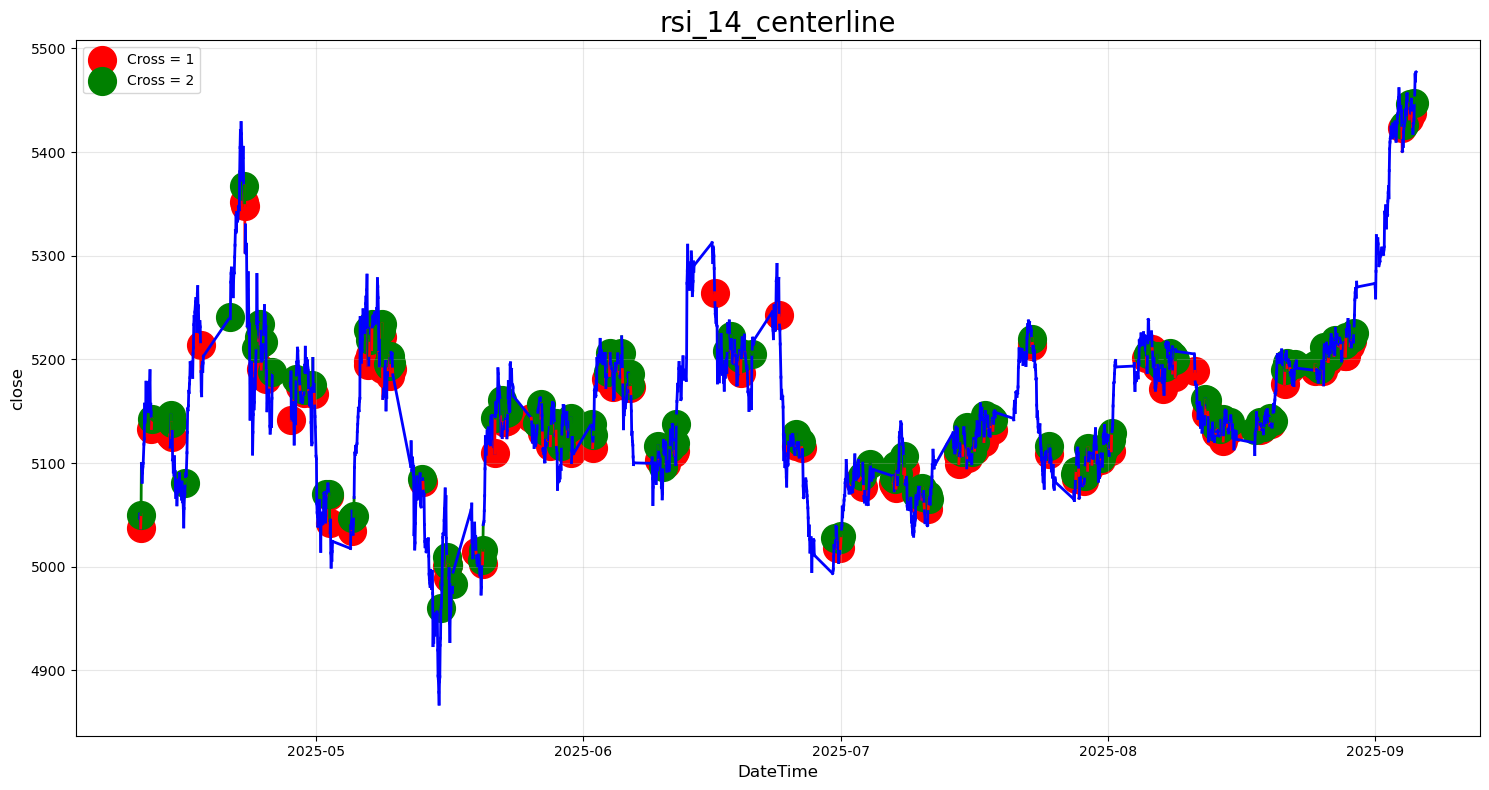

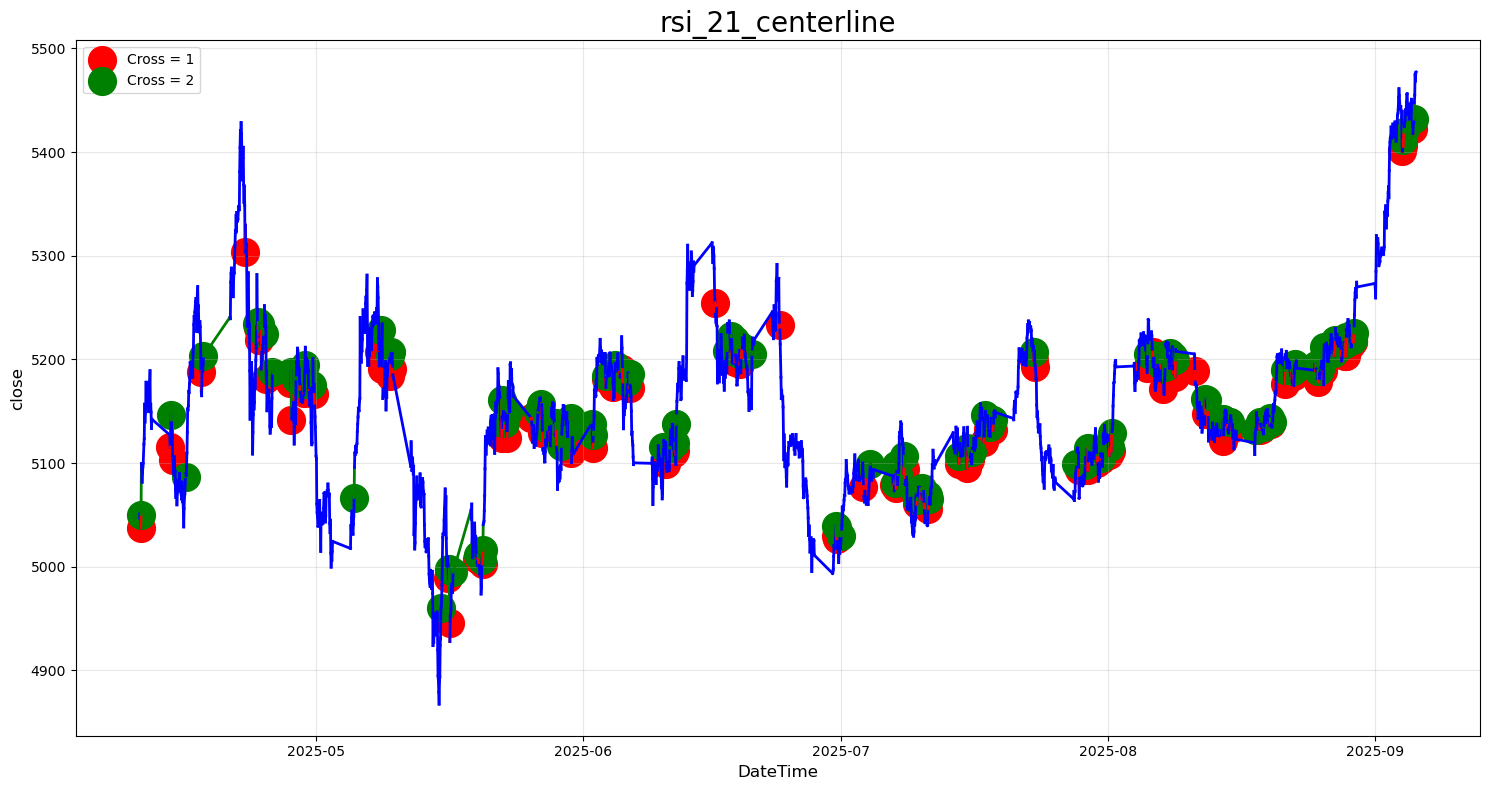

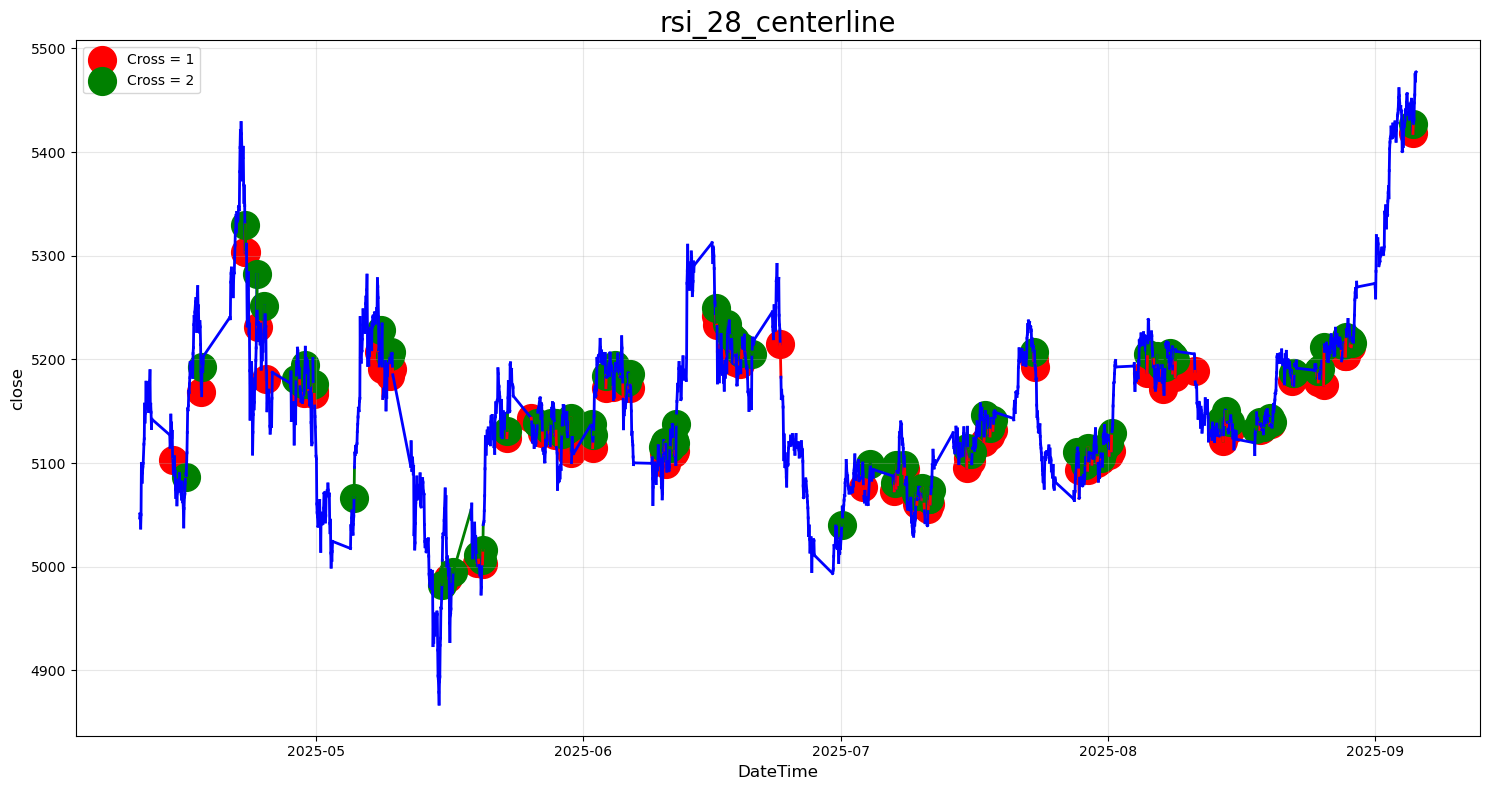

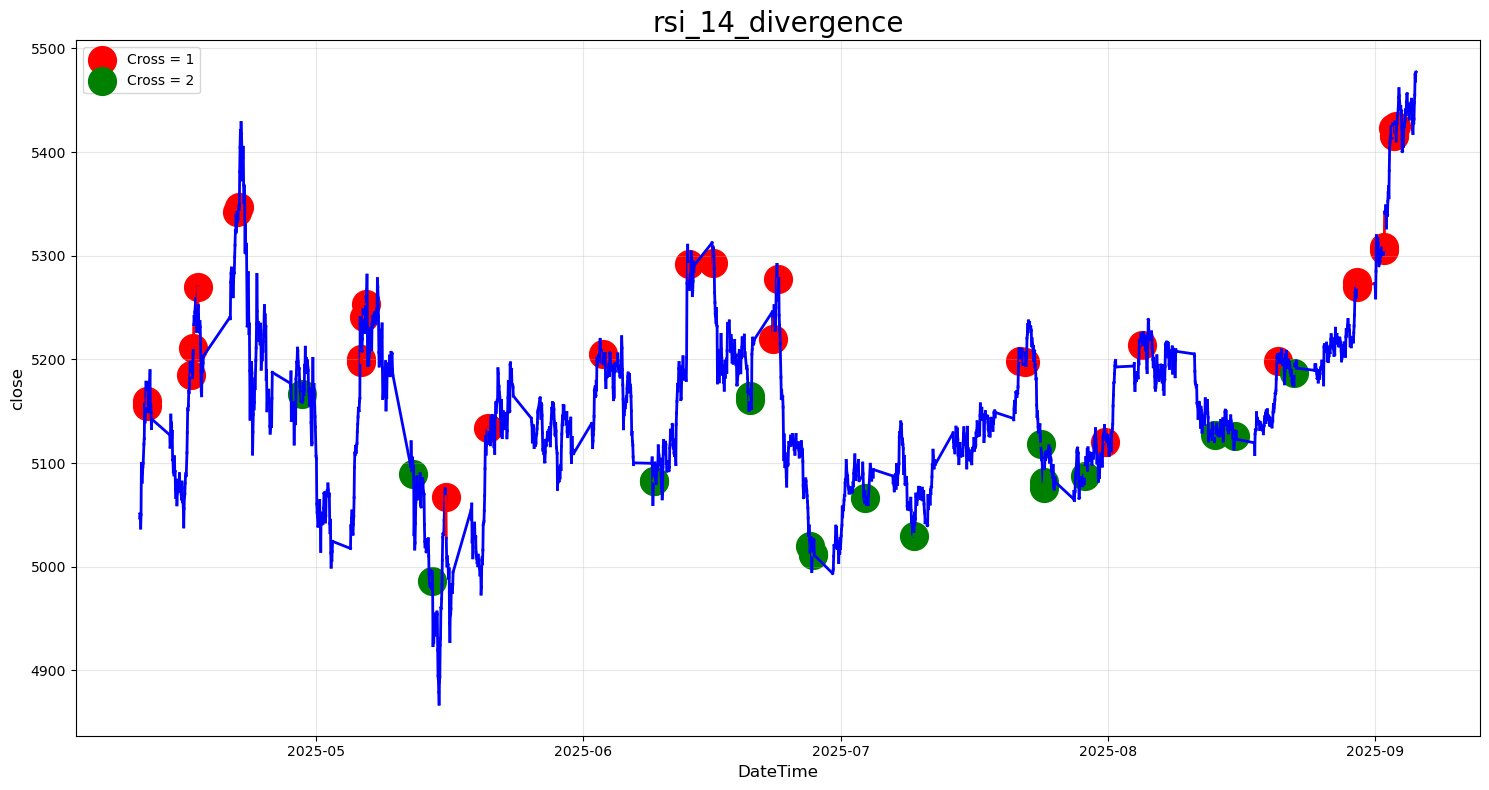

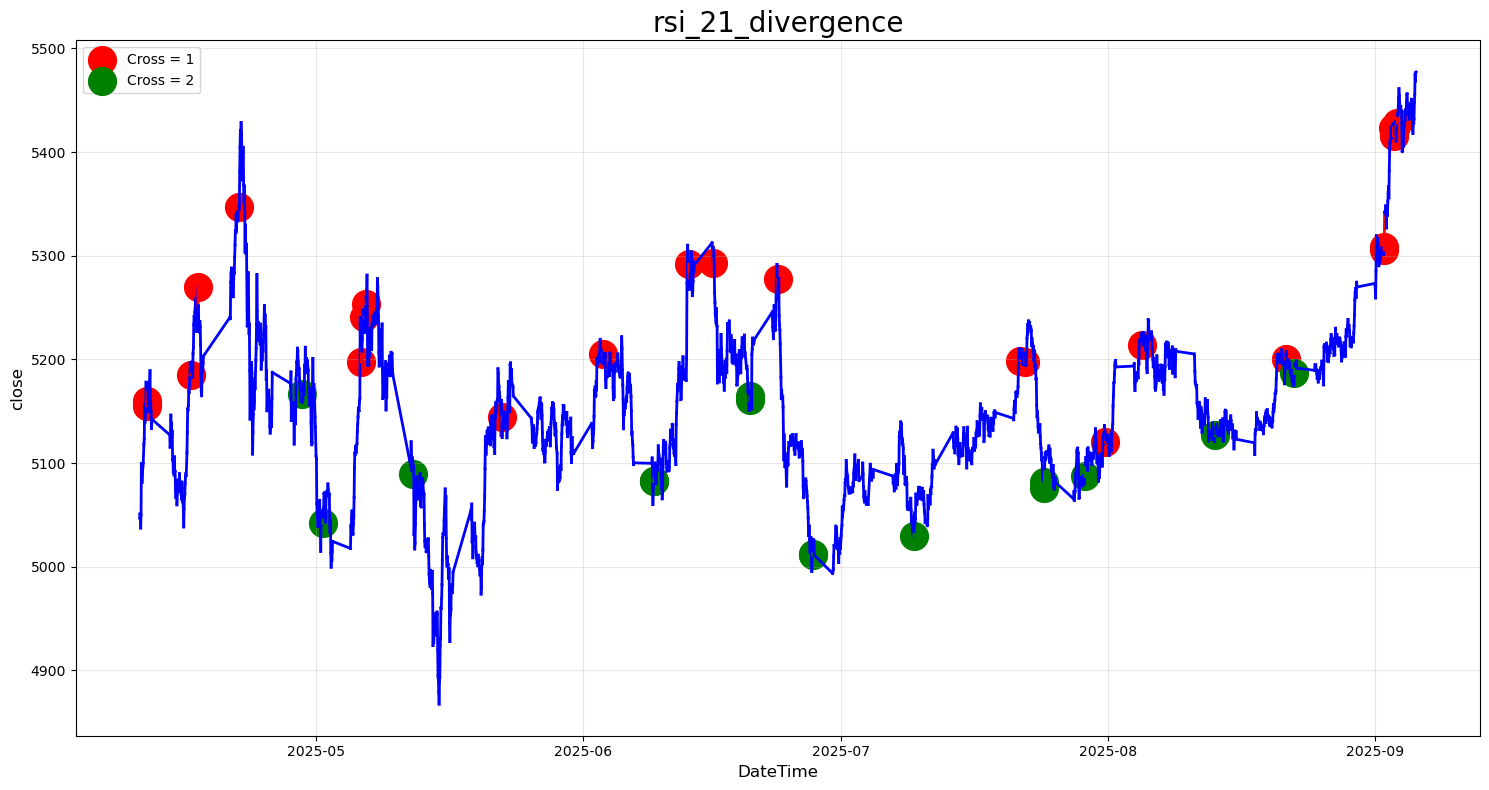

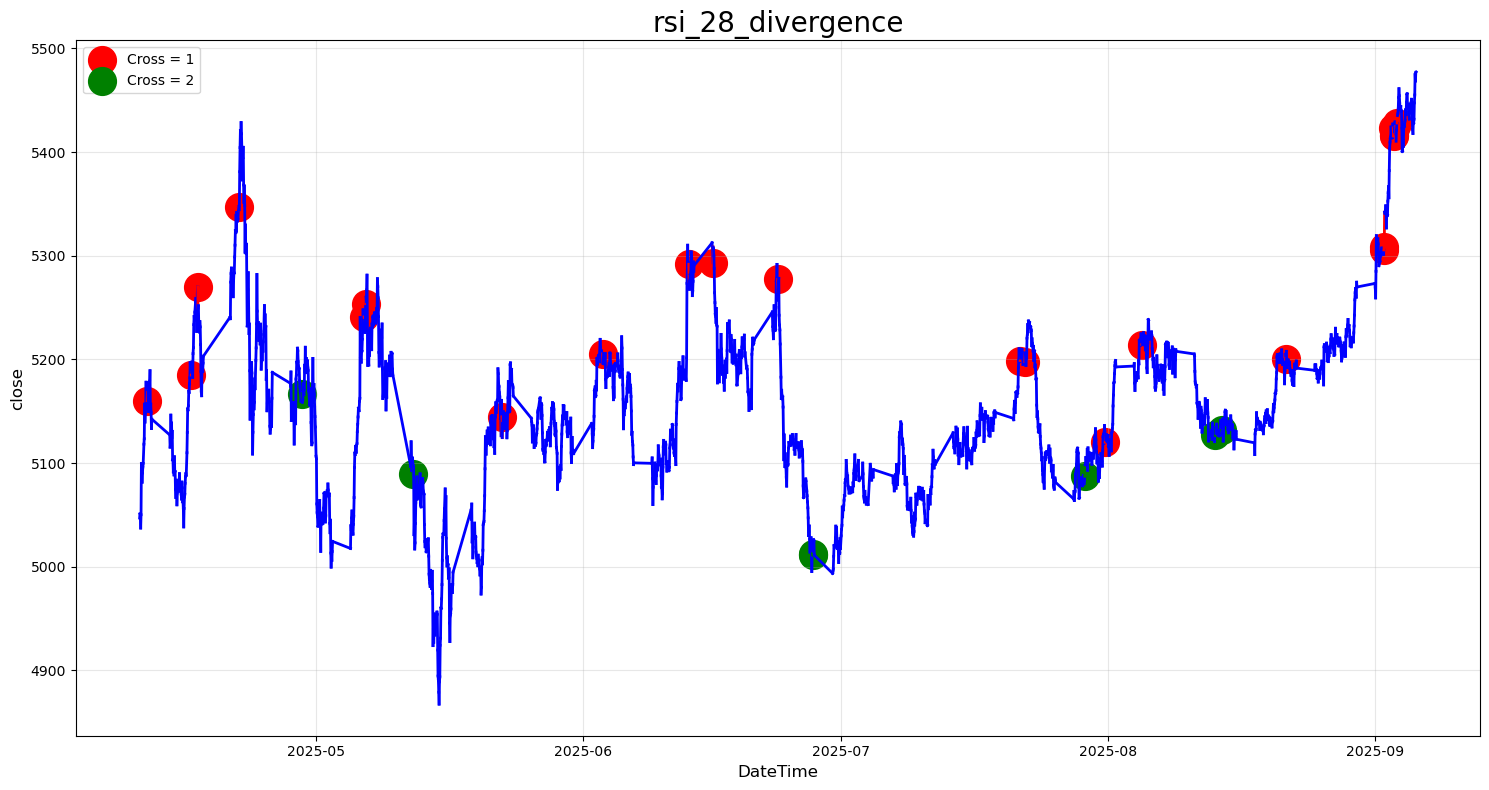

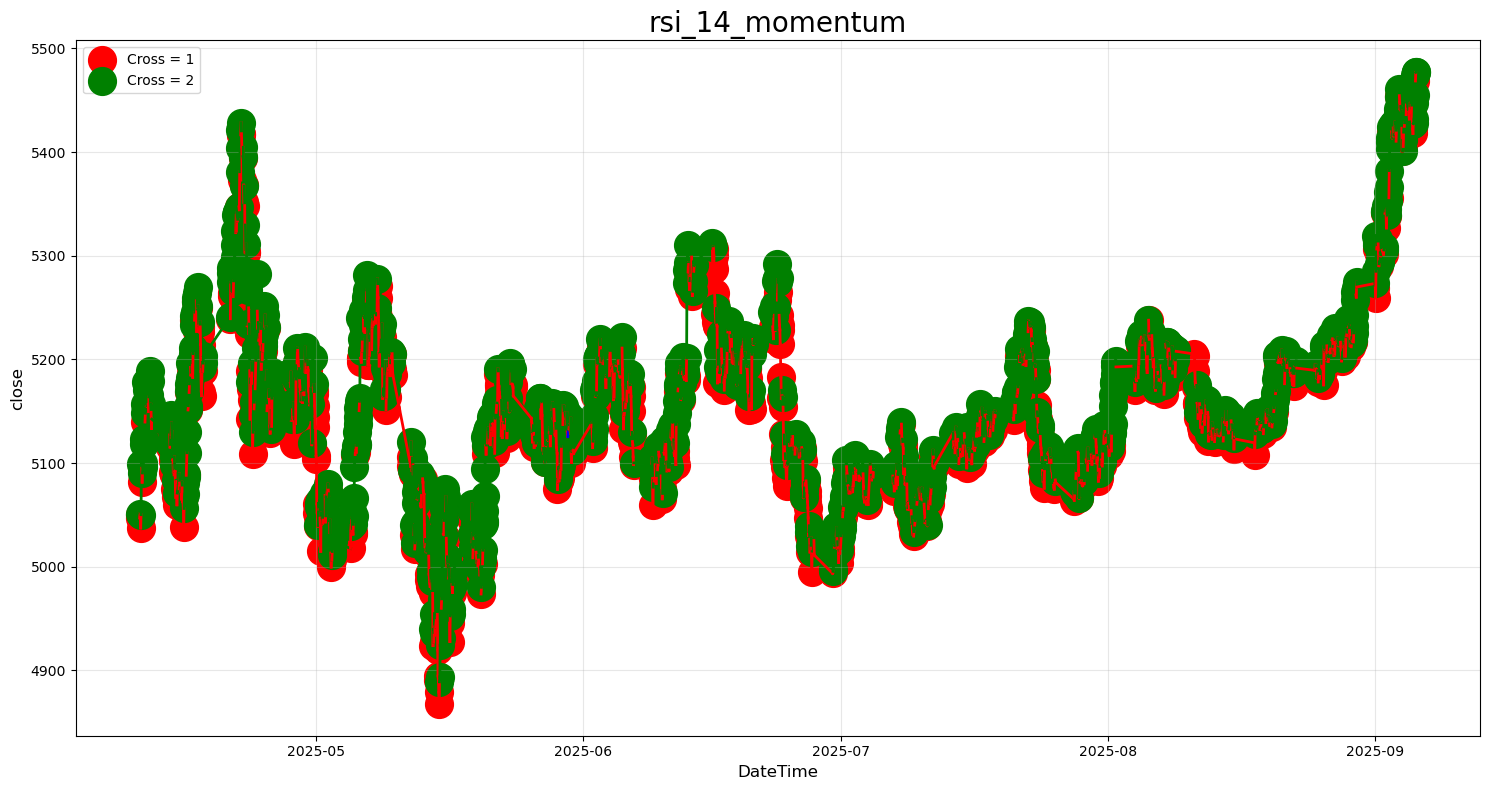

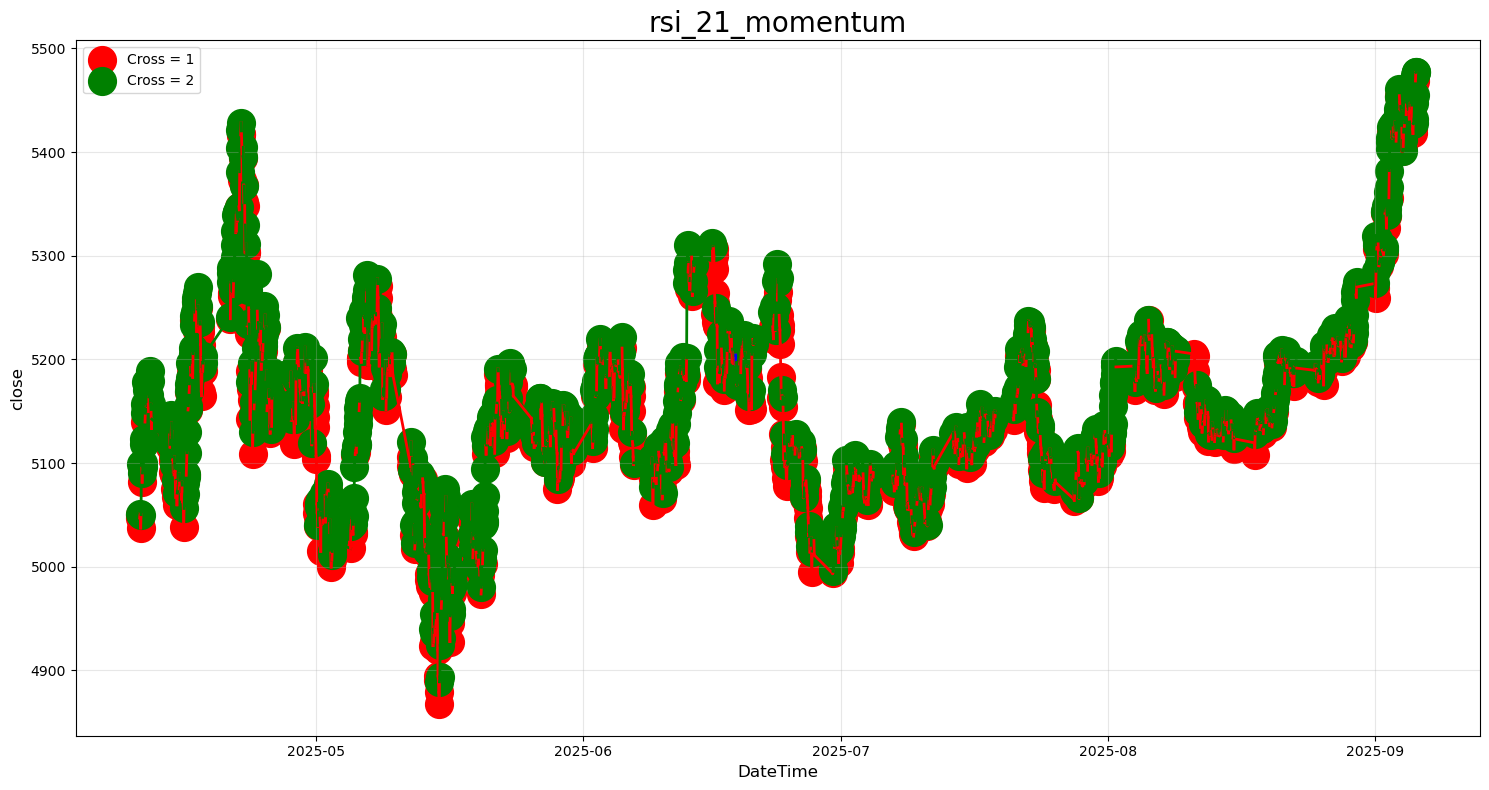

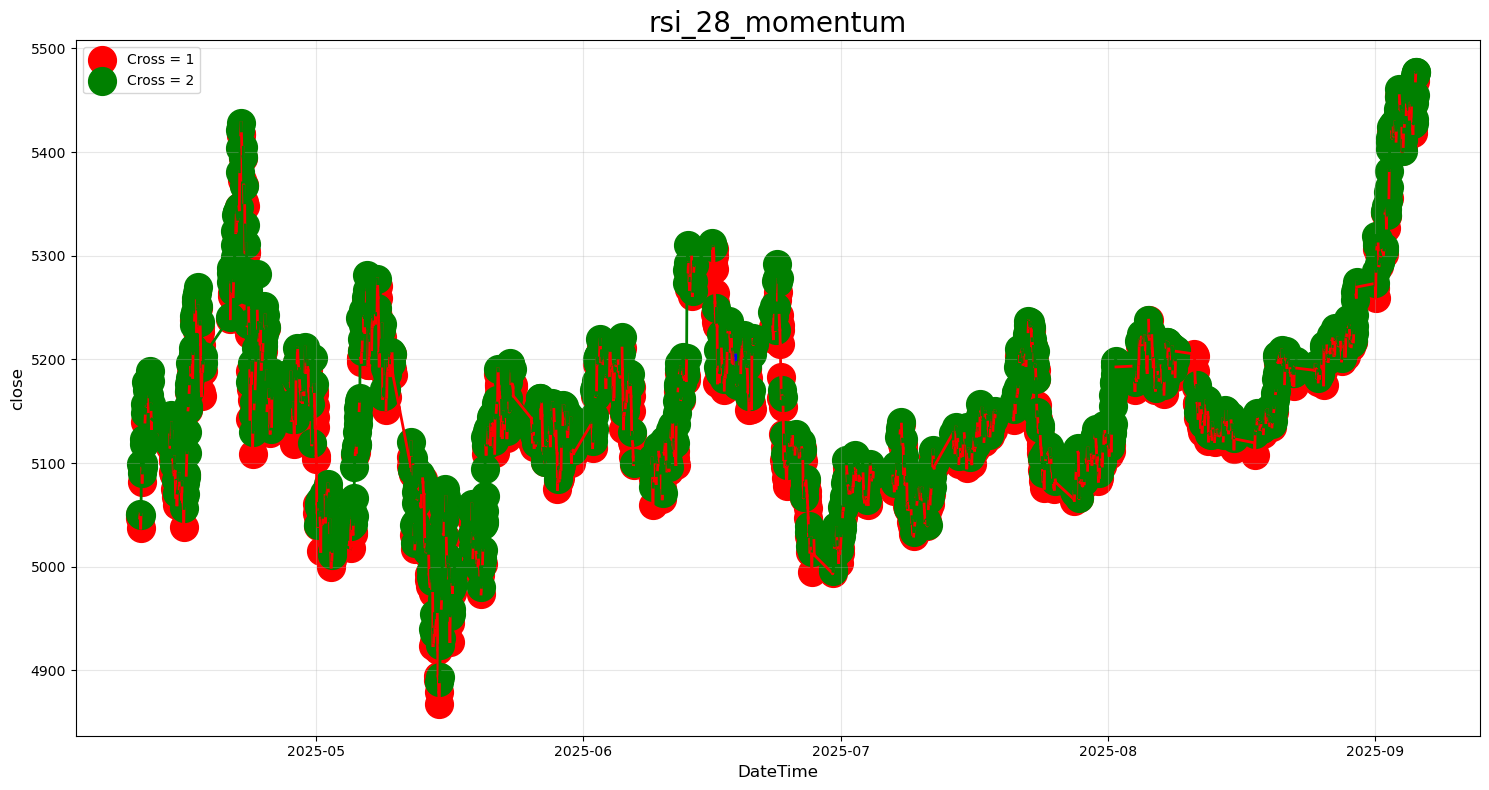

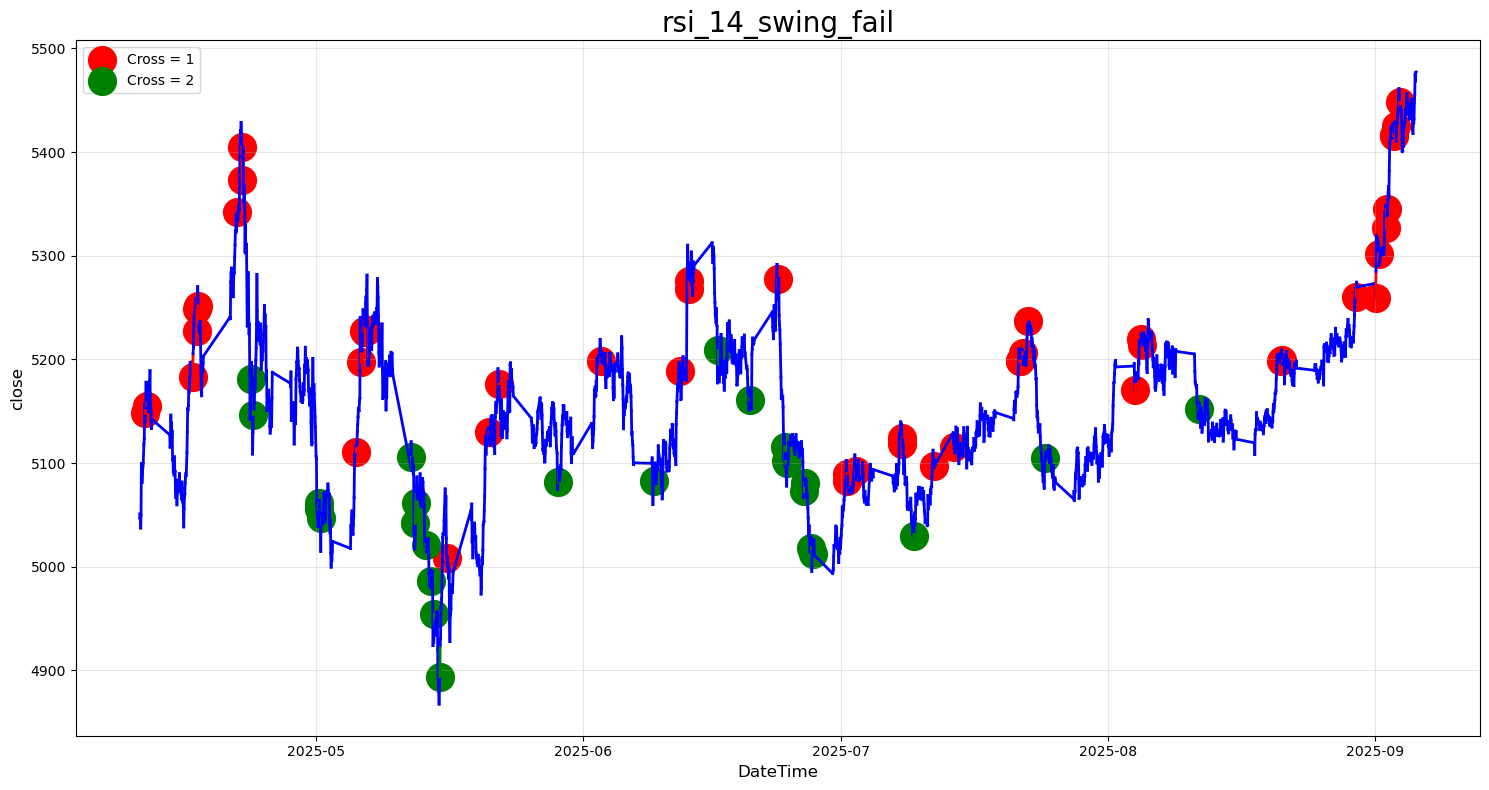

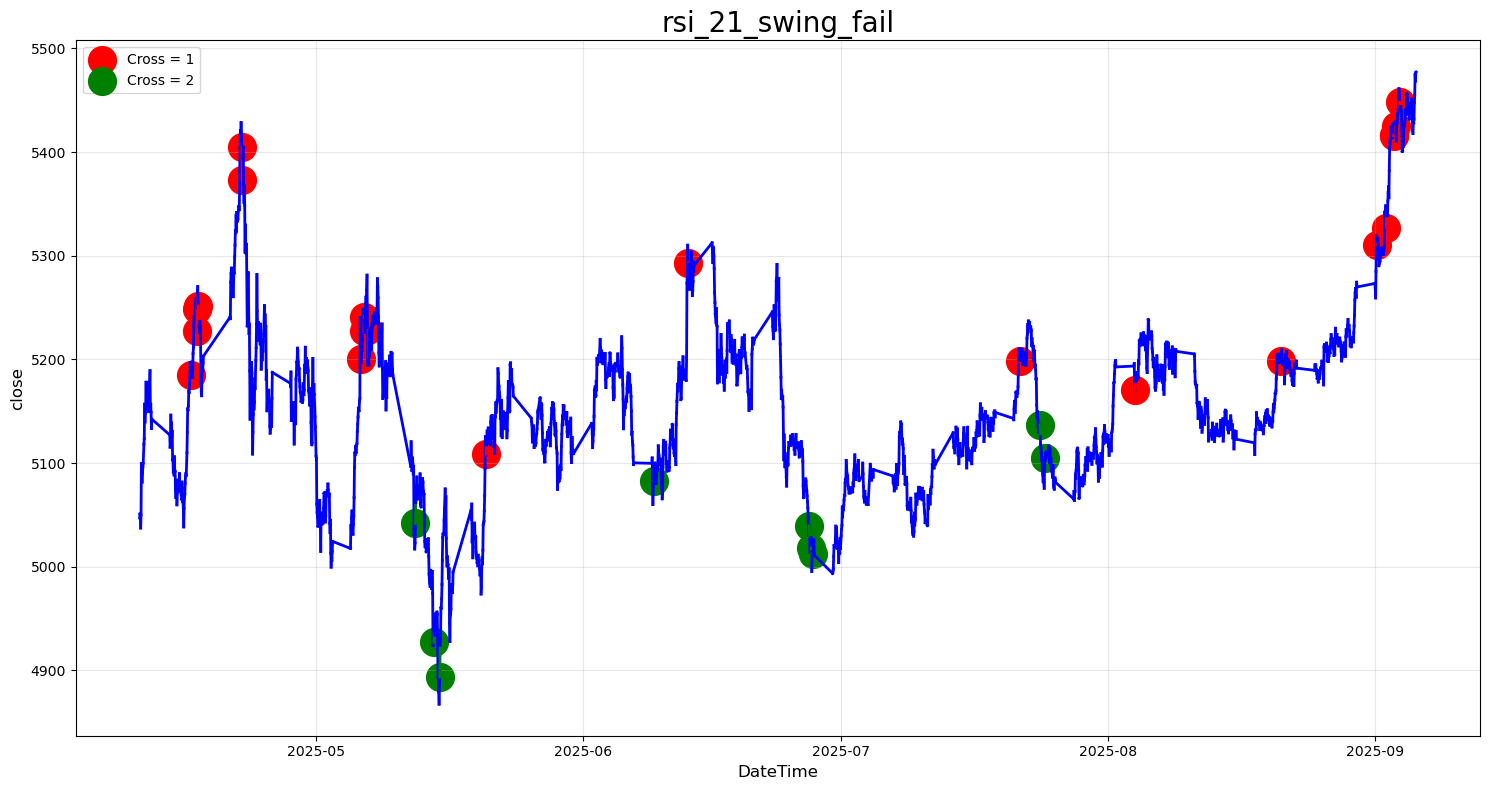

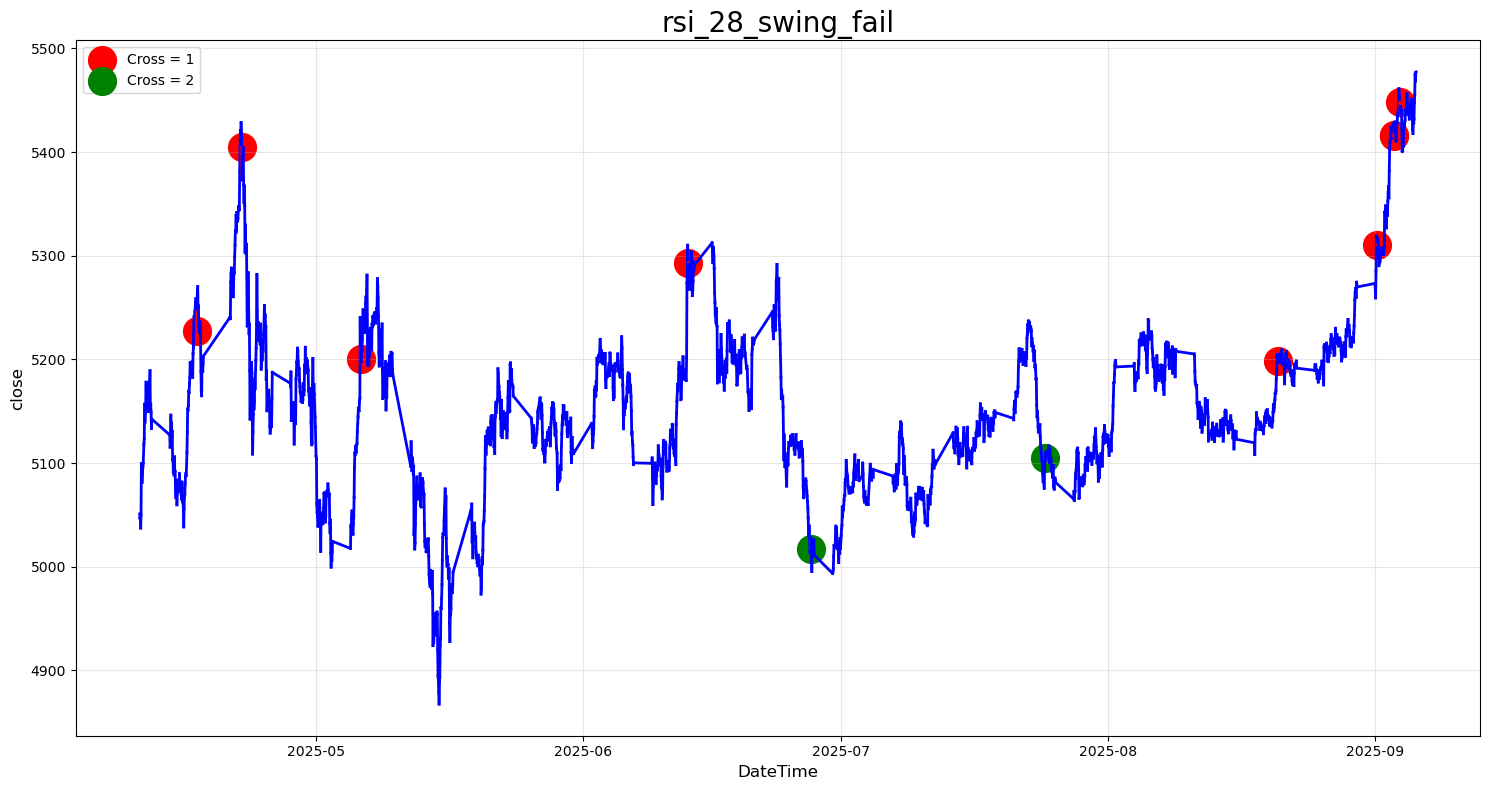

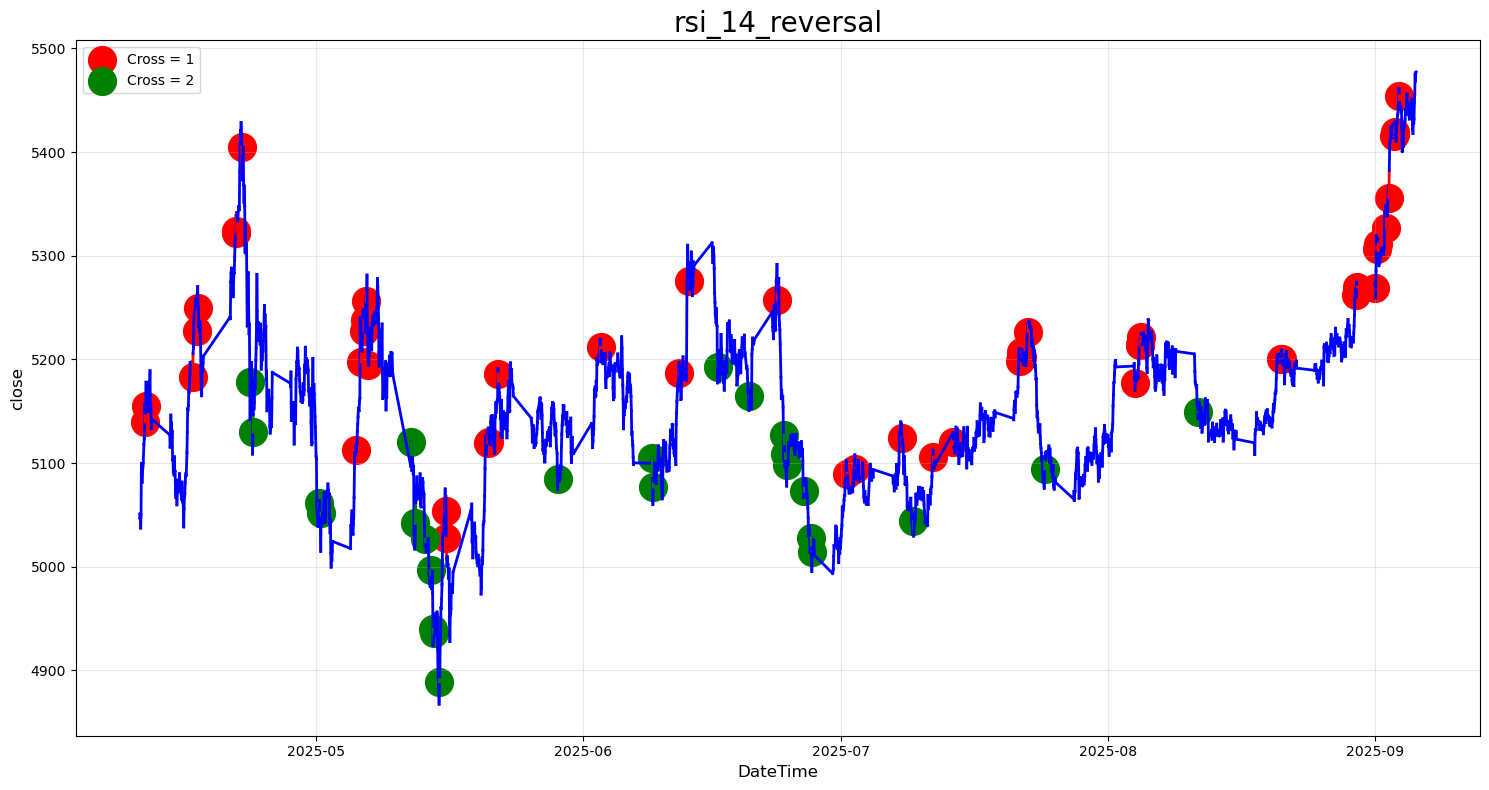

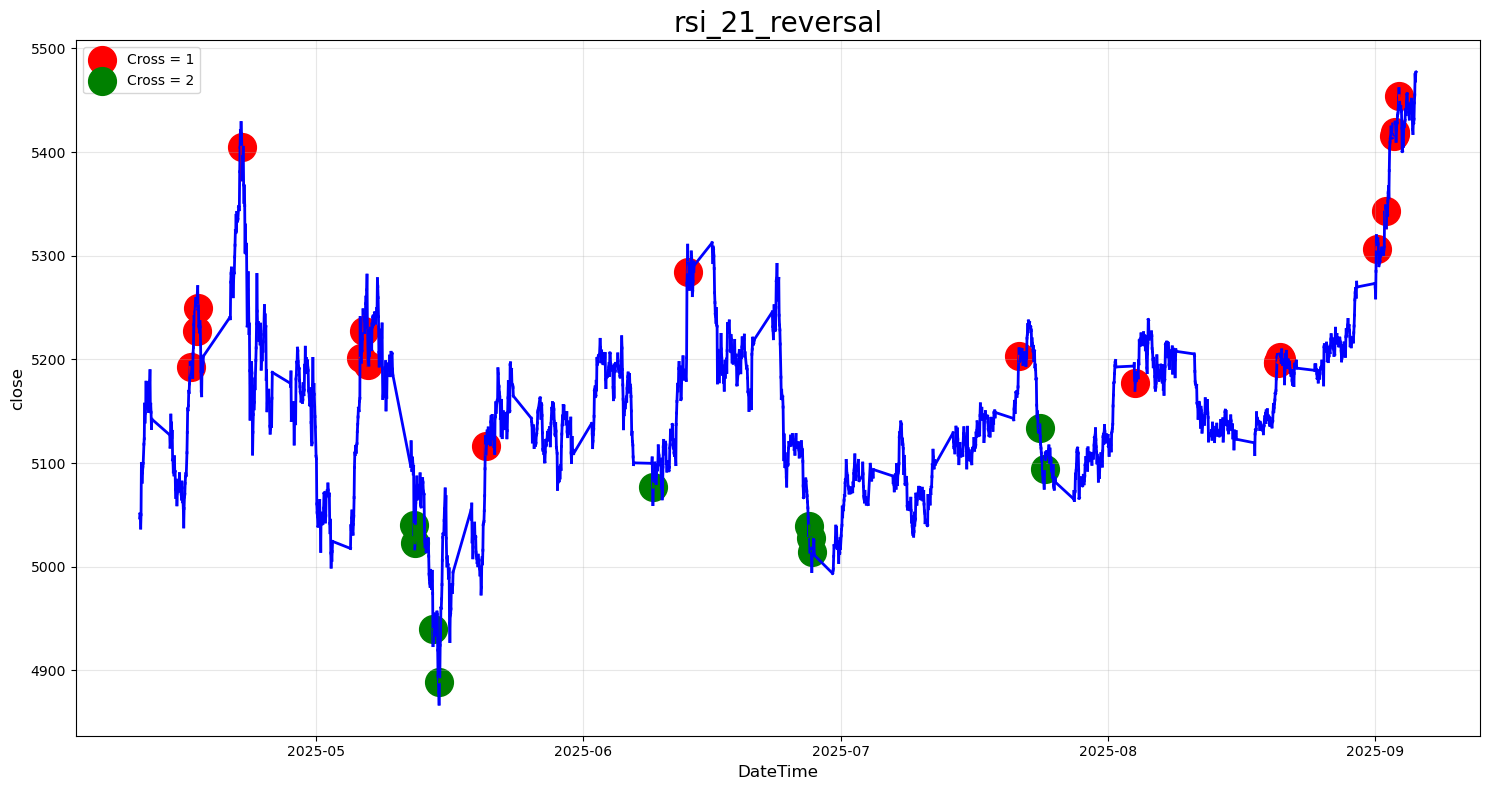

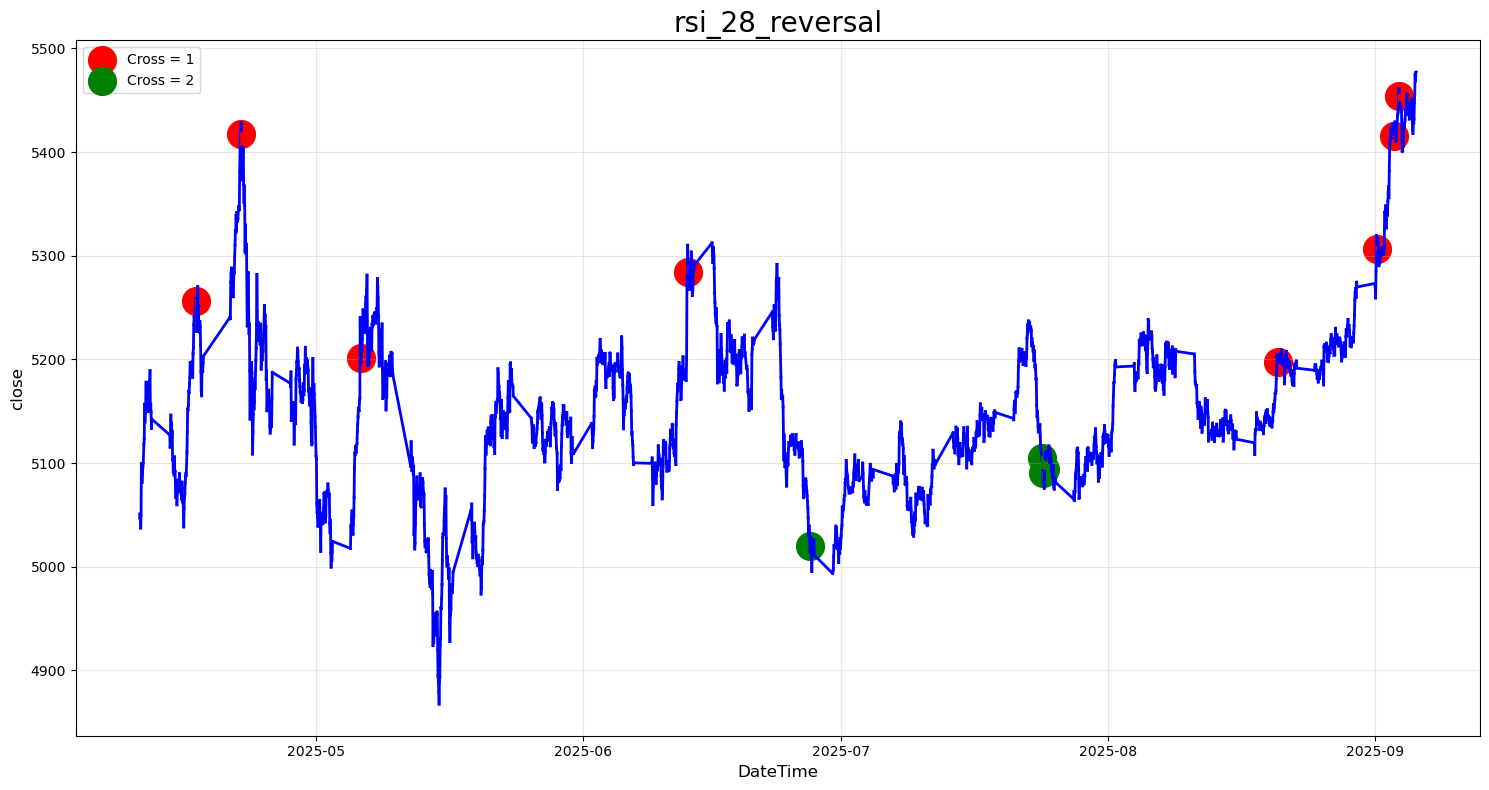

In [15]:
plotter.plot_signals()

In [19]:
signal_cols = s_rsi_data.drop(columns = 'close').columns

In [21]:
signal_cols

Index(['rsi_14_overbought', 'rsi_21_overbought', 'rsi_28_overbought',
       'rsi_14_centerline', 'rsi_21_centerline', 'rsi_28_centerline',
       'rsi_14_divergence', 'rsi_21_divergence', 'rsi_28_divergence',
       'rsi_14_momentum', 'rsi_21_momentum', 'rsi_28_momentum',
       'rsi_14_swing_fail', 'rsi_21_swing_fail', 'rsi_28_swing_fail',
       'rsi_14_reversal', 'rsi_21_reversal', 'rsi_28_reversal'],
      dtype='object')

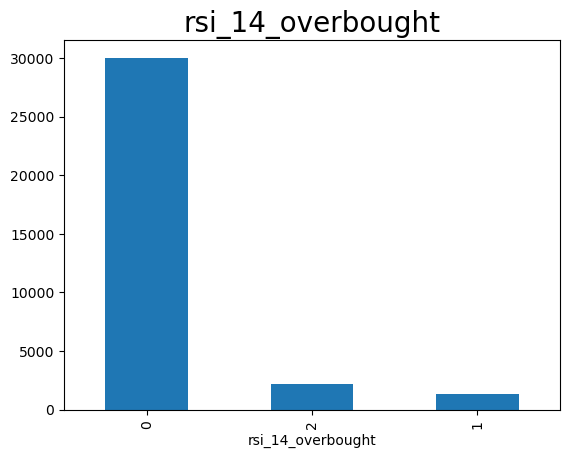

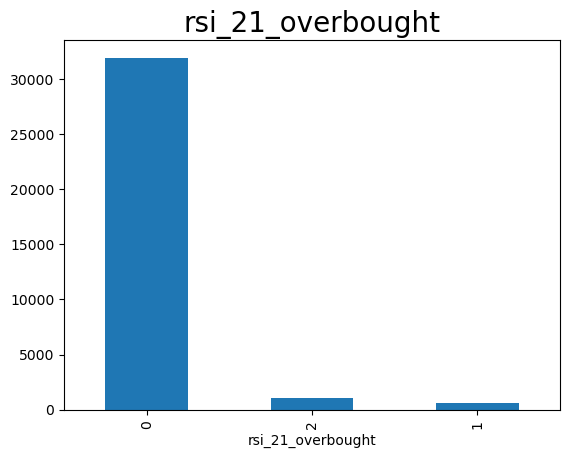

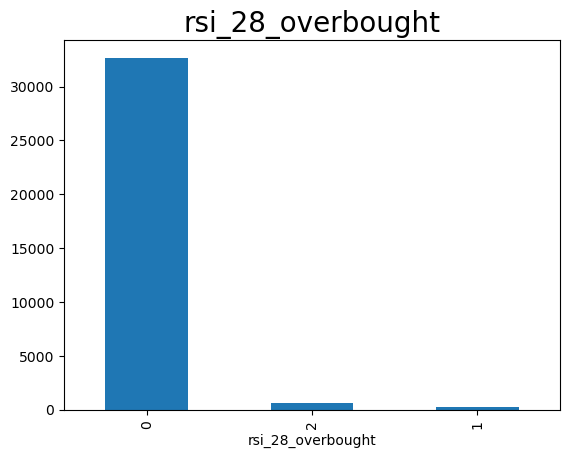

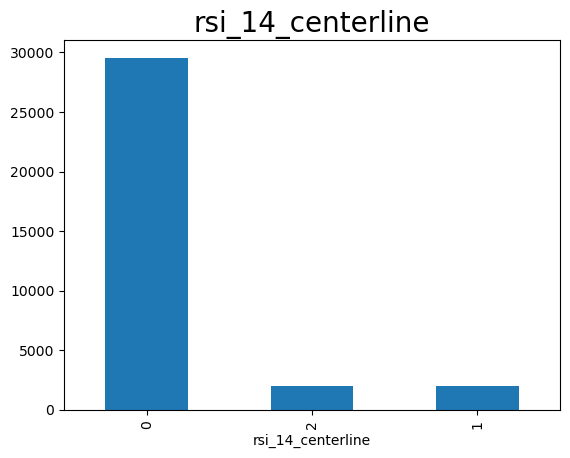

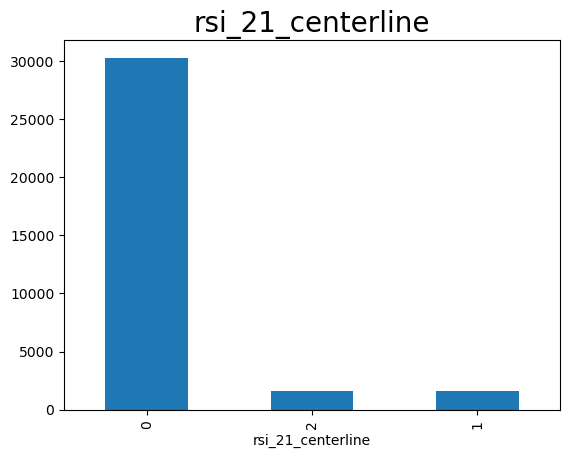

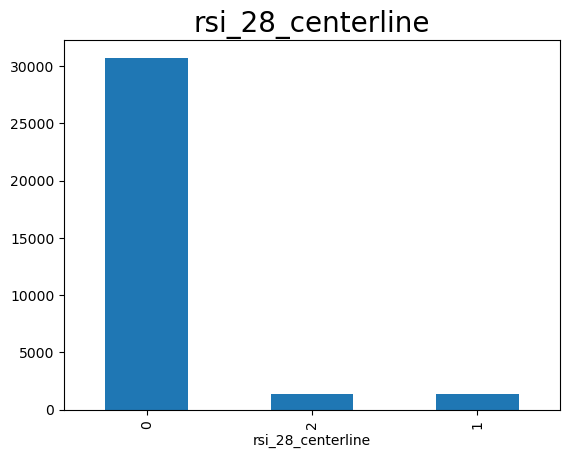

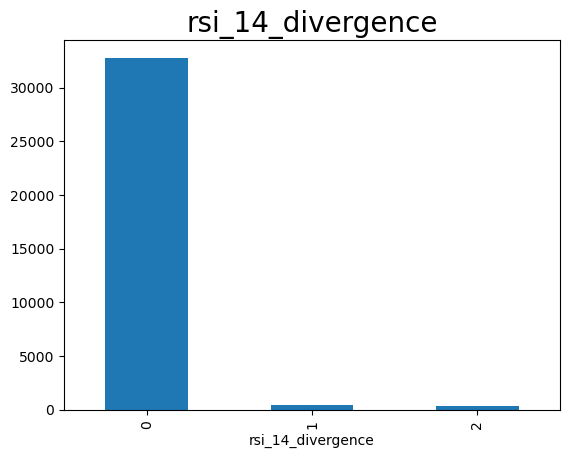

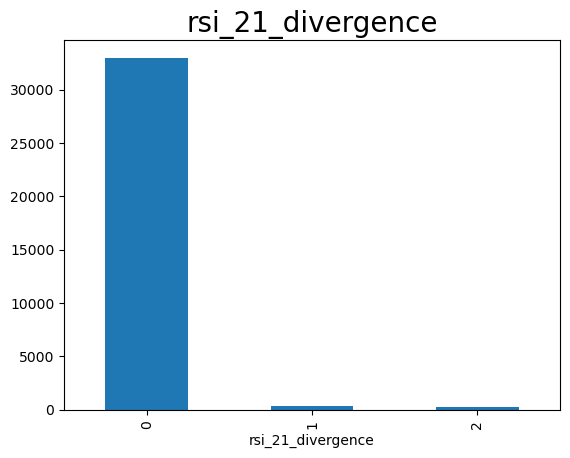

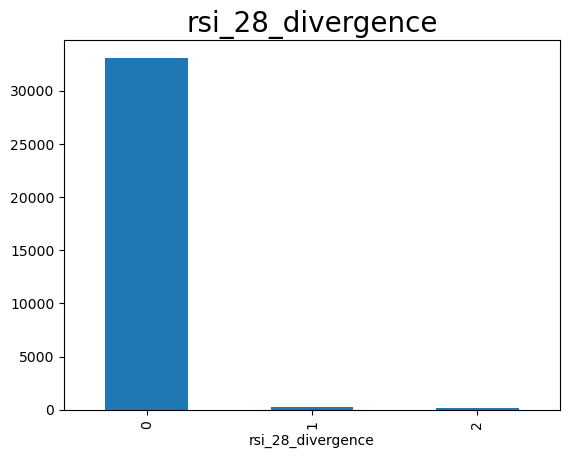

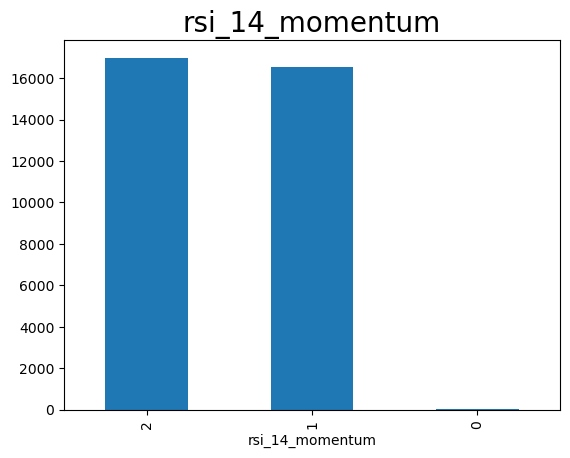

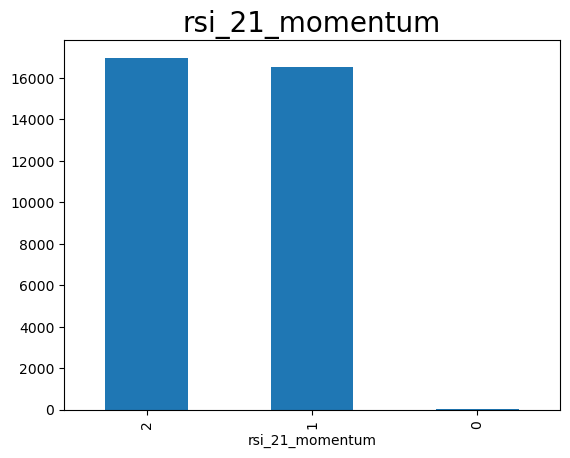

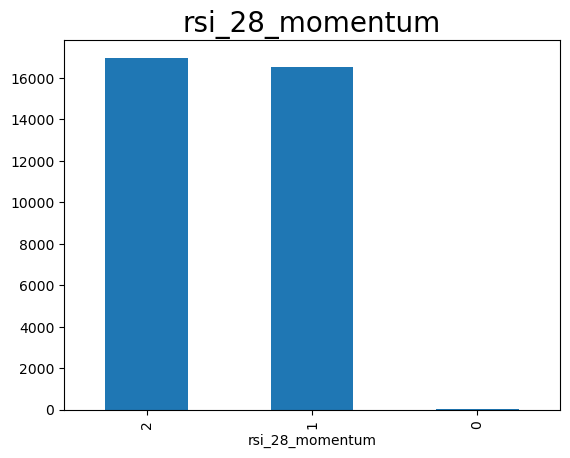

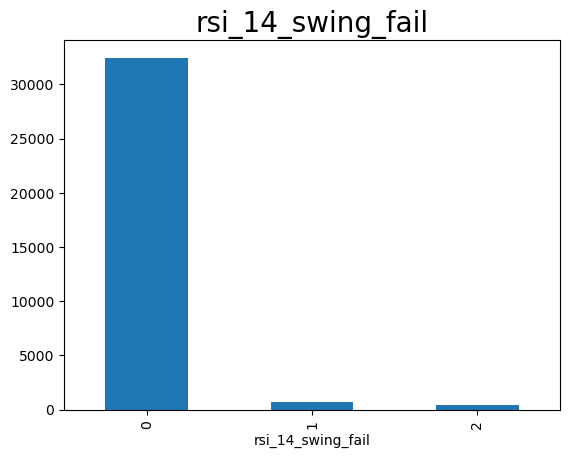

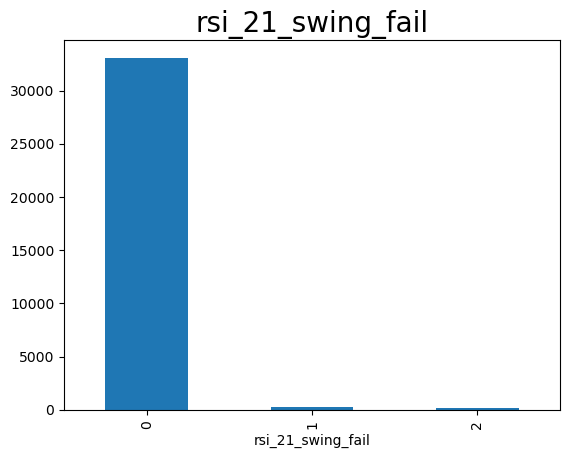

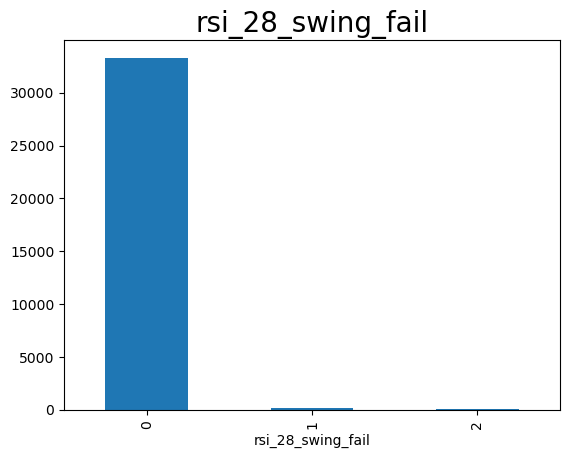

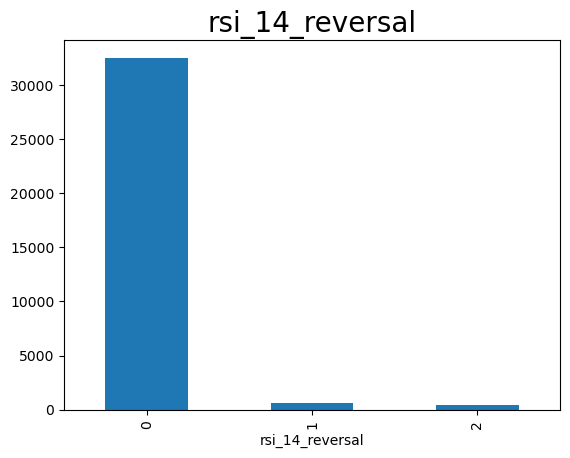

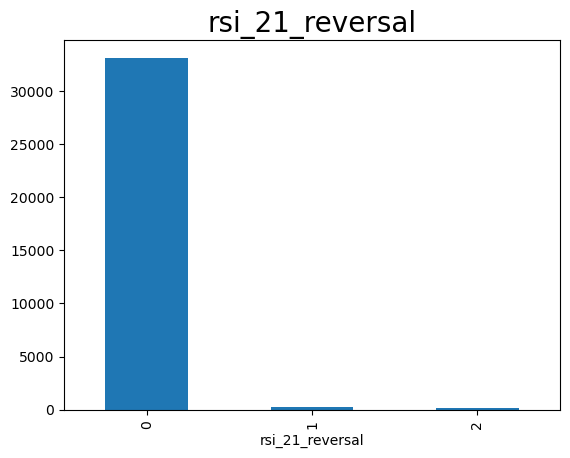

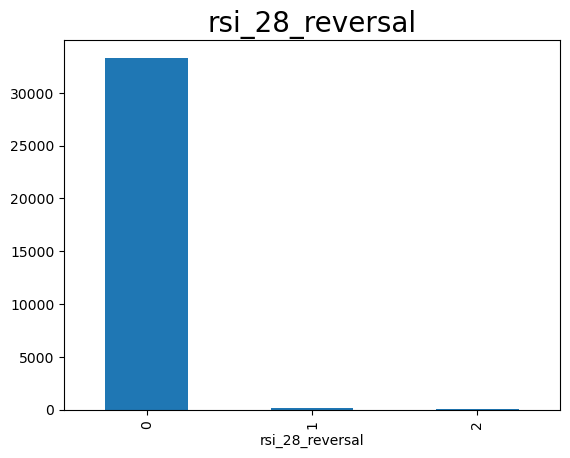

In [23]:
for col in signal_cols:
    s_rsi_data[col].value_counts().plot(kind = 'bar')
    plt.title(col, fontsize = 20)
    plt.show()